In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#import pandas_profiling
import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn import utils
from sklearn.ensemble import RandomForestRegressor
from sklearn import ensemble
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.model_selection import ShuffleSplit, train_test_split 
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from datetime import date
from io import StringIO # python3; python2: BytesIO 
import boto3
#import vpython as vs

# Data Preparation

### Load the csv file 

In [2]:
phooddata18 = pd.read_csv("s3://sagemaker-predicted-data/client_0/location_0/foodlogloc18.csv")

In [3]:
phooddata18.head(5)

,Unnamed: 0,X,id,itemname,itemtype,datecreated,datedumped,mealtype,actiontaken,actionreason,quantity,quantitytype,locationid
0,18528,19817,21082,Grill,Menu,2017-06-22 17:49:19,2017-06-22,Lunch,Composted,Over Production,4.6,Pound,18
1,18543,19832,21099,Hot Line,Menu,2017-07-12 12:58:06,2017-07-12,Breakfast,Discarded,Over Production,4.6,Pound,18
2,18544,19833,21100,Post Consumer,Menu,2017-07-12 13:27:42,2017-07-12,Breakfast,Composted,Over Production,12.5,Pound,18
3,18545,19834,21101,Trim Waste,Menu,2017-07-12 13:34:35,2017-07-12,Breakfast,Composted,Over Production,22.0,Pound,18
4,18546,19835,21102,Trim Waste,Menu,2017-07-12 17:45:15,2017-07-12,Lunch,Composted,Over Production,12.0,Pound,18


In [4]:
phooddata18.describe()

,Unnamed: 0,X,id,quantity,locationid
count,690.000000,690.000000,690.000000,690.000000,690.0
mean,19876.028986,21178.163768,22492.943478,15.444058,18.0
std,1421.738120,1428.895412,1487.639264,12.312209,0.0
min,18528.000000,19817.000000,21082.000000,0.000000,18.0
25%,18726.250000,20015.250000,21290.250000,6.525000,18.0
50%,19171.500000,20477.500000,21755.500000,12.450000,18.0
75%,21678.750000,22989.750000,24335.750000,21.400000,18.0
max,22393.000000,23704.000000,25136.000000,85.000000,18.0


### Clean Null Values

In [5]:
phooddata18clean = phooddata18[phooddata18.notnull()]

In [6]:
phooddata18clean.head(5)

,Unnamed: 0,X,id,itemname,itemtype,datecreated,datedumped,mealtype,actiontaken,actionreason,quantity,quantitytype,locationid
0,18528,19817,21082,Grill,Menu,2017-06-22 17:49:19,2017-06-22,Lunch,Composted,Over Production,4.6,Pound,18
1,18543,19832,21099,Hot Line,Menu,2017-07-12 12:58:06,2017-07-12,Breakfast,Discarded,Over Production,4.6,Pound,18
2,18544,19833,21100,Post Consumer,Menu,2017-07-12 13:27:42,2017-07-12,Breakfast,Composted,Over Production,12.5,Pound,18
3,18545,19834,21101,Trim Waste,Menu,2017-07-12 13:34:35,2017-07-12,Breakfast,Composted,Over Production,22.0,Pound,18
4,18546,19835,21102,Trim Waste,Menu,2017-07-12 17:45:15,2017-07-12,Lunch,Composted,Over Production,12.0,Pound,18


In [7]:
phooddata18clean.describe()

,Unnamed: 0,X,id,quantity,locationid
count,690.000000,690.000000,690.000000,690.000000,690.0
mean,19876.028986,21178.163768,22492.943478,15.444058,18.0
std,1421.738120,1428.895412,1487.639264,12.312209,0.0
min,18528.000000,19817.000000,21082.000000,0.000000,18.0
25%,18726.250000,20015.250000,21290.250000,6.525000,18.0
50%,19171.500000,20477.500000,21755.500000,12.450000,18.0
75%,21678.750000,22989.750000,24335.750000,21.400000,18.0
max,22393.000000,23704.000000,25136.000000,85.000000,18.0


### Details of our data

In [8]:
#pandas_profiling.ProfileReport(phooddata18clean)

In [9]:
uniqueitems = phooddata18clean.itemname.unique()
uniqueitems

array(['Grill', 'Hot Line', 'Post Consumer', 'Trim Waste', 'Catering',
       'Dessert', 'Deli', 'Salad', 'Pizza', 'Pasta', 'Soup',
       'Gluten Free'], dtype=object)

In [10]:
uniquemealtype = phooddata18clean.mealtype.unique()
uniquemealtype

array(['Lunch', 'Breakfast', 'Dinner'], dtype=object)

## Feature Selection

### Removing unimportant variables

In [11]:
phooddata18cleanfilter = phooddata18clean.filter(['itemname','datedumped','mealtype','quantity'], axis=1)

In [12]:
#pandas_profiling.ProfileReport(phooddata18cleanfilter)

### Change Date Time function

In [13]:
phooddata18cleanfilter['date'] = pd.to_datetime(phooddata18cleanfilter['datedumped'])
#phooddata18cleanfilter['date'] = [time.date() for time in phooddata18cleanfilter['date']]

In [14]:
phooddata18cleanfilter.head(5)

,itemname,datedumped,mealtype,quantity,date
0,Grill,2017-06-22,Lunch,4.6,2017-06-22
1,Hot Line,2017-07-12,Breakfast,4.6,2017-07-12
2,Post Consumer,2017-07-12,Breakfast,12.5,2017-07-12
3,Trim Waste,2017-07-12,Breakfast,22.0,2017-07-12
4,Trim Waste,2017-07-12,Lunch,12.0,2017-07-12


In [15]:
phooddata18cleanfilter = phooddata18cleanfilter.drop(['datedumped'], axis=1)

In [16]:
#pandas_profiling.ProfileReport(phooddata18cleanfilter)

In [17]:
#phooddata18cleanfilter.date.min()

In [18]:
phooddata18cleanfiltercopy = phooddata18cleanfilter

### One Hot Encoding

In [19]:
#One-hot encode categorical features
phooddata18cleanfilter = pd.get_dummies(phooddata18cleanfilter)
phooddata18cleanfilter.head(5)

,quantity,date,itemname_Catering,itemname_Deli,itemname_Dessert,itemname_Gluten Free,itemname_Grill,itemname_Hot Line,itemname_Pasta,itemname_Pizza,itemname_Post Consumer,itemname_Salad,itemname_Soup,itemname_Trim Waste,mealtype_Breakfast,mealtype_Dinner,mealtype_Lunch
0,4.6,2017-06-22,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,4.6,2017-07-12,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,12.5,2017-07-12,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,22.0,2017-07-12,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
4,12.0,2017-07-12,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


(array([736511., 736542., 736573., 736603., 736634., 736664.]),
 <a list of 6 Text xticklabel objects>)

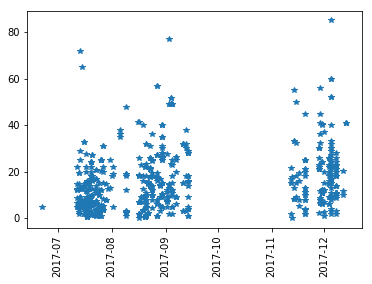

In [20]:
plt.plot(phooddata18cleanfilter['date'], phooddata18cleanfilter['quantity'], '*')
plt.xticks(rotation='vertical')

In [21]:
#pandas_profiling.ProfileReport(phooddata18cleanfilter)

In [22]:
datemin = phooddata18cleanfilter['date'].min()
datemin

Timestamp('2017-06-22 00:00:00')

In [23]:
dateminordinal = datemin.toordinal()
dateminordinal

736502

In [24]:
datemax = phooddata18cleanfilter['date'].max()
datemax

Timestamp('2017-12-14 00:00:00')

In [25]:
datemaxordinal = datemax.toordinal()
datemaxordinal

736677

## Date Time other approach


#### python 
*** <br><font color=blue>_phooddata18cleanfilter['year'] = phooddata18cleanfilter.date.dt.year<br>  phooddata18cleanfilter['month'] = phooddata18cleanfilter.date.dt.month  <br>phooddata18cleanfilter['day'] = phooddata18cleanfilter.date.dt.day_</font>

In [26]:
phooddata18cleanfilter["day"] = phooddata18cleanfilter['date'].map(lambda x: x.day)
phooddata18cleanfilter["month"] = phooddata18cleanfilter['date'].map(lambda x: x.month)
phooddata18cleanfilter["year"] = phooddata18cleanfilter['date'].map(lambda x: x.year)
phooddata18cleanfilter['day_of_week'] = phooddata18cleanfilter['date'].dt.day_name()

In [27]:
phooddata18cleanfilter.head(5)

,quantity,date,itemname_Catering,itemname_Deli,itemname_Dessert,itemname_Gluten Free,itemname_Grill,itemname_Hot Line,itemname_Pasta,itemname_Pizza,...,itemname_Salad,itemname_Soup,itemname_Trim Waste,mealtype_Breakfast,mealtype_Dinner,mealtype_Lunch,day,month,year,day_of_week
0,4.6,2017-06-22,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,22,6,2017,Thursday
1,4.6,2017-07-12,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,12,7,2017,Wednesday
2,12.5,2017-07-12,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,12,7,2017,Wednesday
3,22.0,2017-07-12,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,12,7,2017,Wednesday
4,12.0,2017-07-12,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,12,7,2017,Wednesday


In [28]:
monday = phooddata18cleanfilter[phooddata18cleanfilter['day_of_week']=='Monday']
monday = monday.drop(['day_of_week'], axis=1)
monday

,quantity,date,itemname_Catering,itemname_Deli,itemname_Dessert,itemname_Gluten Free,itemname_Grill,itemname_Hot Line,itemname_Pasta,itemname_Pizza,itemname_Post Consumer,itemname_Salad,itemname_Soup,itemname_Trim Waste,mealtype_Breakfast,mealtype_Dinner,mealtype_Lunch,day,month,year
52,7.2,2017-07-17,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,17,7,2017
53,2.8,2017-07-17,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,17,7,2017
54,19.8,2017-07-17,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,17,7,2017
55,4.0,2017-07-17,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,17,7,2017
56,7.4,2017-07-17,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,17,7,2017
57,6.6,2017-07-17,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,17,7,2017
58,27.6,2017-07-17,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,17,7,2017
59,4.0,2017-07-17,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,17,7,2017
60,21.8,2017-07-17,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,17,7,2017
61,2.0,2017-07-17,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,17,7,2017


In [29]:
tuesday = phooddata18cleanfilter[phooddata18cleanfilter['day_of_week']=='Tuesday']
tuesday = tuesday.drop(['day_of_week'], axis=1)
tuesday

In [30]:
wednesday = phooddata18cleanfilter[phooddata18cleanfilter['day_of_week']=='Wednesday']
wednesday = wednesday.drop(['day_of_week'], axis=1)
wednesday

In [31]:
thursday = phooddata18cleanfilter[phooddata18cleanfilter['day_of_week']=='Thursday']
thursday = thursday.drop(['day_of_week'], axis=1)
thursday

In [32]:
friday = phooddata18cleanfilter[phooddata18cleanfilter['day_of_week']=='Friday']
friday = friday.drop(['day_of_week'], axis=1)
friday

In [33]:
saturday = phooddata18cleanfilter[phooddata18cleanfilter['day_of_week']=='Saturday']
saturday = saturday.drop(['day_of_week'], axis=1)
saturday

In [34]:
sunday = phooddata18cleanfilter[phooddata18cleanfilter['day_of_week']=='Sunday']
sunday = sunday.drop(['day_of_week'], axis=1)
sunday

In [35]:
monday['date'] = monday['date'].apply(lambda x: x.toordinal())

In [36]:
monday

,quantity,date,itemname_Catering,itemname_Deli,itemname_Dessert,itemname_Gluten Free,itemname_Grill,itemname_Hot Line,itemname_Pasta,itemname_Pizza,itemname_Post Consumer,itemname_Salad,itemname_Soup,itemname_Trim Waste,mealtype_Breakfast,mealtype_Dinner,mealtype_Lunch,day,month,year
52,7.2,736527,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,17,7,2017
53,2.8,736527,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,17,7,2017
54,19.8,736527,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,17,7,2017
55,4.0,736527,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,17,7,2017
56,7.4,736527,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,17,7,2017
57,6.6,736527,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,17,7,2017
58,27.6,736527,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,17,7,2017
59,4.0,736527,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,17,7,2017
60,21.8,736527,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,17,7,2017
61,2.0,736527,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,17,7,2017


In [37]:
tuesday['date'] = tuesday['date'].apply(lambda x: x.toordinal())
wednesday['date'] = wednesday['date'].apply(lambda x: x.toordinal())
thursday['date'] = thursday['date'].apply(lambda x: x.toordinal())
friday['date'] = friday['date'].apply(lambda x: x.toordinal())
saturday['date'] = saturday['date'].apply(lambda x: x.toordinal())
sunday['date'] = sunday['date'].apply(lambda x: x.toordinal())

In [38]:
minmonord = min(monday['date'])
minmonord
mintueord = min(tuesday['date'])
mintueord
minwedord = min(wednesday['date'])
minwedord
minthuord = min(thursday['date'])
minthuord
minfriord = min(friday['date'])
minfriord
minsatord = min(saturday['date'])
minsatord
minsunord = min(sunday['date'])
minsunord

736526

In [39]:
monday['date'] = (monday['date'] - min(monday['date'])+1)
tuesday['date'] = (tuesday['date'] - min(tuesday['date'])+1)
wednesday['date'] = (wednesday['date'] - min(wednesday['date'])+1)
thursday['date'] = (thursday['date'] - min(thursday['date'])+1)
friday['date'] = (friday['date'] - min(friday['date'])+1)
saturday['date'] = (saturday['date'] - min(saturday['date'])+1)
sunday['date'] = (sunday['date'] - min(sunday['date'])+1)

In [40]:
monday

,quantity,date,itemname_Catering,itemname_Deli,itemname_Dessert,itemname_Gluten Free,itemname_Grill,itemname_Hot Line,itemname_Pasta,itemname_Pizza,itemname_Post Consumer,itemname_Salad,itemname_Soup,itemname_Trim Waste,mealtype_Breakfast,mealtype_Dinner,mealtype_Lunch,day,month,year
52,7.2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,17,7,2017
53,2.8,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,17,7,2017
54,19.8,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,17,7,2017
55,4.0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,17,7,2017
56,7.4,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,17,7,2017
57,6.6,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,17,7,2017
58,27.6,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,17,7,2017
59,4.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,17,7,2017
60,21.8,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,17,7,2017
61,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,17,7,2017


In [41]:
monday = monday.drop(['day'], axis=1)
monday = monday.drop(['month'], axis=1)
monday = monday.drop(['year'], axis=1)

In [42]:
mondaydatemaxordinal = monday.date.max()
mondaydatemaxordinal

141

In [43]:
tuesday = tuesday.drop(['day'], axis=1)
tuesday = tuesday.drop(['month'], axis=1)
tuesday = tuesday.drop(['year'], axis=1)
tuesdaydatemaxordinal = tuesday.date.max()
tuesdaydatemaxordinal

148

In [44]:
wednesday = wednesday.drop(['day'], axis=1)
wednesday = wednesday.drop(['month'], axis=1)
wednesday = wednesday.drop(['year'], axis=1)
wednesdaydatemaxordinal = wednesday.date.max()
wednesdaydatemaxordinal

141

In [45]:
thursday = thursday.drop(['day'], axis=1)
thursday = thursday.drop(['month'], axis=1)
thursday = thursday.drop(['year'], axis=1)
thursdaydatemaxordinal = thursday.date.max()
thursdaydatemaxordinal

176

In [46]:
friday = friday.drop(['day'], axis=1)
friday = friday.drop(['month'], axis=1)
friday = friday.drop(['year'], axis=1)
fridaydatemaxordinal = friday.date.max()
fridaydatemaxordinal

148

In [47]:
saturday = saturday.drop(['day'], axis=1)
saturday = saturday.drop(['month'], axis=1)
saturday = saturday.drop(['year'], axis=1)
saturdaydatemaxordinal = saturday.date.max()
saturdaydatemaxordinal

50

In [48]:
sunday = sunday.drop(['day'], axis=1)
sunday = sunday.drop(['month'], axis=1)
sunday = sunday.drop(['year'], axis=1)
sundaydatemaxordinal = sunday.date.max()
sundaydatemaxordinal

120

In [49]:
mondayCompare = pd.DataFrame(columns=['Model Name', 'MAE'])
tuesdayCompare = pd.DataFrame(columns=['Model Name', 'MAE'])
wednesdayCompare = pd.DataFrame(columns=['Model Name', 'MAE'])
thursdayCompare = pd.DataFrame(columns=['Model Name', 'MAE'])
fridayCompare = pd.DataFrame(columns=['Model Name', 'MAE'])
saturdayCompare = pd.DataFrame(columns=['Model Name', 'MAE'])
sundayCompare = pd.DataFrame(columns=['Model Name', 'MAE'])

In [50]:
mondayCompare

,Model Name,MAE


# Monday

# Training and Testing Sets

### Features and Labels

In [51]:
features = monday

In [52]:
# Using numpy to convert to arrays
# Labels are the values we want to predict
labels = np.array(features['quantity'])

In [53]:
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('quantity', axis = 1)

In [54]:
# Saving feature names for later use
feature_list = list(features.columns)

In [55]:
# Convert to numpy array
features = np.array(features)

In [56]:
#labels

In [57]:
#features

In [58]:
# Using Skicit-learn to split data into training and testing sets

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25,
                                                                           random_state = 42)

In [59]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (75, 16)
Training Labels Shape: (75,)
Testing Features Shape: (25, 16)
Testing Labels Shape: (25,)


## Random Forest

In [60]:
# Instantiate model 
rf = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Train the model on training data
rf.fit(train_features, train_labels);

In [61]:
#train_features.dtype

In [62]:
#train_labels.dtype

In [63]:
rf_new = RandomForestRegressor(n_estimators = 100, criterion = 'mse', max_depth = None, 
                               min_samples_split = 2, min_samples_leaf = 1)

In [64]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

In [65]:
# Calculate the absolute errors
errors = abs(predictions - test_labels)

In [66]:
# Print out the mean absolute error (mae)
#print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

In [67]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


In [68]:
rfer = mean_absolute_error(test_labels, predictions)

In [69]:
#rfer

In [70]:
#Compare

In [71]:
mondayCompare.loc[0] = ['Random Forest', rfer]

In [72]:
#Compare

In [73]:
## The line / model
#plt.scatter(test_labels, predictions)



In [74]:
'''plt.plot(test_labels, color='green')
plt.plot(predictions, color='blue')

plt.show()'''

"plt.plot(test_labels, color='green')\nplt.plot(predictions, color='blue')\n\nplt.show()"

## Linear Regression

In [75]:
lm = LinearRegression()

In [76]:
lm.fit(train_features,train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [77]:
lmpredictions = lm.predict(test_features)

In [78]:
lnrer = mean_absolute_error(test_labels, lmpredictions)
#lnrer

In [79]:
mondayCompare.loc[1] = ['Linear Regression', lnrer]
#Compare

In [80]:
#plt.scatter(test_labels,lmpredictions)

In [81]:
'''plt.plot(test_labels, color='green')
plt.plot(lmpredictions, color='blue')

plt.show()'''

"plt.plot(test_labels, color='green')\nplt.plot(lmpredictions, color='blue')\n\nplt.show()"

## Logistic Regression

In [82]:
logreg = LogisticRegression()

In [83]:
#train_labels

In [84]:
lab_enc = preprocessing.LabelEncoder()
train_labels_encoded = lab_enc.fit_transform(train_labels)
'''print(train_labels_encoded)
print(utils.multiclass.type_of_target(train_labels))
print(utils.multiclass.type_of_target(train_labels.astype('int')))
print(utils.multiclass.type_of_target(train_labels_encoded))'''

"print(train_labels_encoded)\nprint(utils.multiclass.type_of_target(train_labels))\nprint(utils.multiclass.type_of_target(train_labels.astype('int')))\nprint(utils.multiclass.type_of_target(train_labels_encoded))"

In [85]:
logreg.fit(train_features,train_labels_encoded)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [86]:
logregpredictions = logreg.predict(test_features)

In [87]:
logregpredictions = list(lab_enc.inverse_transform(logregpredictions))

In [88]:
lgrer = mean_absolute_error(test_labels, logregpredictions)
#lgrer

In [89]:
mondayCompare.loc[2] = ['Logistic Regression', lgrer]
#Compare

In [90]:
'''plt.plot(test_labels, color='green')
plt.plot(logregpredictions, color='blue')

plt.show()'''

"plt.plot(test_labels, color='green')\nplt.plot(logregpredictions, color='blue')\n\nplt.show()"

## Support Vector Machine

In [91]:
svmm = svm.SVC()

In [92]:
lab_enc = preprocessing.LabelEncoder()
train_labels_encoded = lab_enc.fit_transform(train_labels)
'''print(utils.multiclass.type_of_target(train_labels))
print(utils.multiclass.type_of_target(train_labels.astype('int')))
print(utils.multiclass.type_of_target(train_labels_encoded))'''

"print(utils.multiclass.type_of_target(train_labels))\nprint(utils.multiclass.type_of_target(train_labels.astype('int')))\nprint(utils.multiclass.type_of_target(train_labels_encoded))"

In [93]:
svmm.fit(train_features,train_labels_encoded)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [94]:
svmpredictions = svmm.predict(test_features)

In [95]:
svmpredictions = list(lab_enc.inverse_transform(svmpredictions))

In [96]:
svmer = mean_absolute_error(test_labels, svmpredictions)
#svmer

In [97]:
mondayCompare.loc[3] = ['Support Vector Machine', svmer]
#Compare

In [98]:
'''plt.plot(test_labels, color='green')
plt.plot(svmpredictions, color='blue')

plt.show()'''

"plt.plot(test_labels, color='green')\nplt.plot(svmpredictions, color='blue')\n\nplt.show()"

## Principal Component Analysis

In [99]:
pca = PCA()
regr = LinearRegression()

In [100]:
model = LinearRegression()
rfe = RFE(model,3)

In [101]:
fit_model=rfe.fit(train_features,train_labels)
#print(fit_model.get_support())

In [102]:
model = ExtraTreesRegressor()
model.fit(train_features,train_labels)
#print(model.feature_importances_)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [103]:
 etrpredictions= model.predict(test_features)

In [104]:
etrer = mean_absolute_error(test_labels, etrpredictions)
#etrer

In [105]:
mondayCompare.loc[4] = ['Principal Component Analysis', etrer]
#Compare

In [106]:
#plt.scatter(test_labels,etrpredictions)

In [107]:
'''plt.plot(test_labels, color='green')
plt.plot(etrpredictions, color='blue')

plt.show()'''

"plt.plot(test_labels, color='green')\nplt.plot(etrpredictions, color='blue')\n\nplt.show()"

## Lasso Regression

In [108]:
# Lasso regression object
lasso = Lasso(alpha = 0.4, normalize = True)



In [109]:
# Fit to data
lasso.fit(train_features,train_labels)



Lasso(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [110]:
lassopredictions= lasso.predict(test_features)

In [111]:
lsrer = mean_absolute_error(test_labels, lassopredictions)
#lsrer

In [112]:
mondayCompare.loc[5] = ['Lasso Regression', lsrer]
#Compare

In [113]:
#plt.scatter(test_labels,lassopredictions)

## Gradient Boosted Regressor

In [114]:
gbrclf = GradientBoostingRegressor()
gbrclf.fit(train_features,train_labels)




GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [115]:
predicted = gbrclf.predict(test_features)
expected = test_labels




In [116]:
gbmer = mean_absolute_error(test_labels, predicted)
#gbmer

In [117]:
mondayCompare.loc[6] = ['Gradient Boosting Machine', gbmer]
#Compare

In [118]:
'''plt.figure(figsize=(4, 3))
plt.scatter(expected, predicted)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True quantity in lbs')
plt.ylabel('Predicted Quantity in lbs')
plt.tight_layout()'''

"plt.figure(figsize=(4, 3))\nplt.scatter(expected, predicted)\nplt.plot([0, 50], [0, 50], '--k')\nplt.axis('tight')\nplt.xlabel('True quantity in lbs')\nplt.ylabel('Predicted Quantity in lbs')\nplt.tight_layout()"

In [119]:
#plt.scatter(test_labels,predicted)

In [120]:
'''plt.plot(test_labels, color='green')
plt.plot(predicted, color='blue')

plt.show()'''

"plt.plot(test_labels, color='green')\nplt.plot(predicted, color='blue')\n\nplt.show()"

# Model Comparison

In [121]:
#Compare

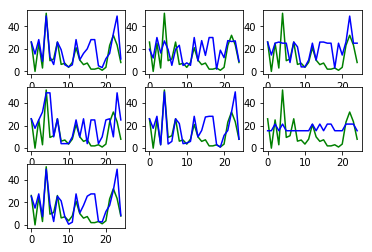

In [122]:
import matplotlib.pyplot as plt

x = test_labels
y = [predictions,lmpredictions,logregpredictions,svmpredictions,etrpredictions,lassopredictions,predicted]
fig = plt.figure()

plt.subplot(3, 3, 1)
plt.plot(x, color='green')
plt.plot(y[0], color='blue')


plt.subplot(3, 3, 2)
plt.plot(x, color='green')
plt.plot(y[1], color='blue')


plt.subplot(3, 3, 3)
plt.plot(x, color='green')
plt.plot(y[2], color='blue')


plt.subplot(3, 3, 4)
plt.plot(x, color='green')
plt.plot(y[3], color='blue')

plt.subplot(3, 3, 5)
plt.plot(x, color='green')
plt.plot(y[4], color='blue')

plt.subplot(3, 3, 6)
plt.plot(x, color='green')
plt.plot(y[5], color='blue')

plt.subplot(3, 3, 7)
plt.plot(x, color='green')
plt.plot(y[6], color='blue')
 
plt.show()



In [123]:
mondayCompare

,Model Name,MAE
0,Random Forest,7.357026
1,Linear Regression,9.760142
2,Logistic Regression,10.640000
3,Support Vector Machine,10.796000
4,Principal Component Analysis,7.441933
5,Lasso Regression,10.330955
6,Gradient Boosting Machine,7.845427


In [124]:
mondayBestMAE = mondayCompare['MAE'].min()
#BestMAE

In [125]:
mondaybestrow = mondayCompare.index[mondayCompare['MAE'] == mondayBestMAE]
#bestrow

In [126]:
mondaybestmodel = mondayCompare.iloc[mondaybestrow,0]
#bestmodel
#print('Best Model for Prediction is',bestmodel)

# Tuesday

# Training and Testing Sets

### Features and Labels

In [127]:
features = tuesday

In [128]:
# Using numpy to convert to arrays
# Labels are the values we want to predict
labels = np.array(features['quantity'])

In [129]:
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('quantity', axis = 1)

In [130]:
# Saving feature names for later use
feature_list = list(features.columns)

In [131]:
# Convert to numpy array
features = np.array(features)

In [132]:
#labels

In [133]:
#features

In [134]:
# Using Skicit-learn to split data into training and testing sets

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25,
                                                                           random_state = 42)

In [135]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (93, 16)
Training Labels Shape: (93,)
Testing Features Shape: (32, 16)
Testing Labels Shape: (32,)


## Random Forest

In [136]:
# Instantiate model 
rf = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Train the model on training data
rf.fit(train_features, train_labels);

In [137]:
#train_features.dtype

In [138]:
#train_labels.dtype

In [139]:
rf_new = RandomForestRegressor(n_estimators = 100, criterion = 'mse', max_depth = None, 
                               min_samples_split = 2, min_samples_leaf = 1)

In [140]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

In [141]:
# Calculate the absolute errors
errors = abs(predictions - test_labels)

In [142]:
# Print out the mean absolute error (mae)
#print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

In [143]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)

In [144]:
rfer = mean_absolute_error(test_labels, predictions)

In [145]:
#rfer

In [146]:
#Compare

In [147]:
tuesdayCompare.loc[0] = ['Random Forest', rfer]

In [148]:
#Compare

In [149]:
## The line / model
#plt.scatter(test_labels, predictions)



In [150]:
'''plt.plot(test_labels, color='green')
plt.plot(predictions, color='blue')

plt.show()'''

"plt.plot(test_labels, color='green')\nplt.plot(predictions, color='blue')\n\nplt.show()"

## Linear Regression

In [151]:
lm = LinearRegression()

In [152]:
lm.fit(train_features,train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [153]:
lmpredictions = lm.predict(test_features)

In [154]:
lnrer = mean_absolute_error(test_labels, lmpredictions)
#lnrer

In [155]:
tuesdayCompare.loc[1] = ['Linear Regression', lnrer]
#Compare

In [156]:
#plt.scatter(test_labels,lmpredictions)

In [157]:
'''plt.plot(test_labels, color='green')
plt.plot(lmpredictions, color='blue')

plt.show()'''

"plt.plot(test_labels, color='green')\nplt.plot(lmpredictions, color='blue')\n\nplt.show()"

## Logistic Regression

In [158]:
logreg = LogisticRegression()

In [159]:
#train_labels

In [160]:
lab_enc = preprocessing.LabelEncoder()
train_labels_encoded = lab_enc.fit_transform(train_labels)
'''print(train_labels_encoded)
print(utils.multiclass.type_of_target(train_labels))
print(utils.multiclass.type_of_target(train_labels.astype('int')))
print(utils.multiclass.type_of_target(train_labels_encoded))'''

"print(train_labels_encoded)\nprint(utils.multiclass.type_of_target(train_labels))\nprint(utils.multiclass.type_of_target(train_labels.astype('int')))\nprint(utils.multiclass.type_of_target(train_labels_encoded))"

In [161]:
logreg.fit(train_features,train_labels_encoded)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [162]:
logregpredictions = logreg.predict(test_features)

In [163]:
logregpredictions = list(lab_enc.inverse_transform(logregpredictions))

In [164]:
lgrer = mean_absolute_error(test_labels, logregpredictions)
#lgrer

In [165]:
tuesdayCompare.loc[2] = ['Logistic Regression', lgrer]
#Compare

In [166]:
'''plt.plot(test_labels, color='green')
plt.plot(logregpredictions, color='blue')

plt.show()'''

"plt.plot(test_labels, color='green')\nplt.plot(logregpredictions, color='blue')\n\nplt.show()"

## Support Vector Machine

In [167]:
svmm = svm.SVC()

In [168]:
lab_enc = preprocessing.LabelEncoder()
train_labels_encoded = lab_enc.fit_transform(train_labels)
'''print(utils.multiclass.type_of_target(train_labels))
print(utils.multiclass.type_of_target(train_labels.astype('int')))
print(utils.multiclass.type_of_target(train_labels_encoded))'''

"print(utils.multiclass.type_of_target(train_labels))\nprint(utils.multiclass.type_of_target(train_labels.astype('int')))\nprint(utils.multiclass.type_of_target(train_labels_encoded))"

In [169]:
svmm.fit(train_features,train_labels_encoded)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [170]:
svmpredictions = svmm.predict(test_features)

In [171]:
svmpredictions = list(lab_enc.inverse_transform(svmpredictions))

In [172]:
svmer = mean_absolute_error(test_labels, svmpredictions)
#svmer

In [173]:
tuesdayCompare.loc[3] = ['Support Vector Machine', svmer]
#Compare

In [174]:
'''plt.plot(test_labels, color='green')
plt.plot(svmpredictions, color='blue')

plt.show()'''

"plt.plot(test_labels, color='green')\nplt.plot(svmpredictions, color='blue')\n\nplt.show()"

## Principal Component Analysis

In [175]:
pca = PCA()
regr = LinearRegression()

In [176]:
model = LinearRegression()
rfe = RFE(model,3)

In [177]:
fit_model=rfe.fit(train_features,train_labels)
#print(fit_model.get_support())

In [178]:
model = ExtraTreesRegressor()
model.fit(train_features,train_labels)
#print(model.feature_importances_)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [179]:
 etrpredictions= model.predict(test_features)

In [180]:
etrer = mean_absolute_error(test_labels, etrpredictions)
#etrer

In [181]:
tuesdayCompare.loc[4] = ['Principal Component Analysis', etrer]
#Compare

In [182]:
#plt.scatter(test_labels,etrpredictions)

In [183]:
'''plt.plot(test_labels, color='green')
plt.plot(etrpredictions, color='blue')

plt.show()'''

"plt.plot(test_labels, color='green')\nplt.plot(etrpredictions, color='blue')\n\nplt.show()"

## Lasso Regression

In [184]:
# Lasso regression object
lasso = Lasso(alpha = 0.4, normalize = True)



In [185]:
# Fit to data
lasso.fit(train_features,train_labels)



Lasso(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [186]:
lassopredictions= lasso.predict(test_features)

In [187]:
lsrer = mean_absolute_error(test_labels, lassopredictions)
#lsrer

In [188]:
tuesdayCompare.loc[5] = ['Lasso Regression', lsrer]
#Compare

In [189]:
#plt.scatter(test_labels,lassopredictions)

## Gradient Boosted Regressor

In [190]:
gbrclf = GradientBoostingRegressor()
gbrclf.fit(train_features,train_labels)




GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [191]:
predicted = gbrclf.predict(test_features)
expected = test_labels




In [192]:
gbmer = mean_absolute_error(test_labels, predicted)
#gbmer

In [193]:
tuesdayCompare.loc[6] = ['Gradient Boosting Machine', gbmer]
#Compare

In [194]:
'''plt.figure(figsize=(4, 3))
plt.scatter(expected, predicted)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True quantity in lbs')
plt.ylabel('Predicted Quantity in lbs')
plt.tight_layout()'''

"plt.figure(figsize=(4, 3))\nplt.scatter(expected, predicted)\nplt.plot([0, 50], [0, 50], '--k')\nplt.axis('tight')\nplt.xlabel('True quantity in lbs')\nplt.ylabel('Predicted Quantity in lbs')\nplt.tight_layout()"

In [195]:
#plt.scatter(test_labels,predicted)

In [196]:
'''plt.plot(test_labels, color='green')
plt.plot(predicted, color='blue')

plt.show()'''

"plt.plot(test_labels, color='green')\nplt.plot(predicted, color='blue')\n\nplt.show()"

# Model Comparison

In [197]:
#Compare

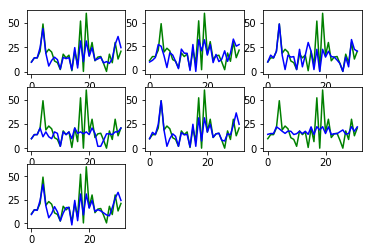

In [198]:
import matplotlib.pyplot as plt

x = test_labels
y = [predictions,lmpredictions,logregpredictions,svmpredictions,etrpredictions,lassopredictions,predicted]
fig = plt.figure()

plt.subplot(3, 3, 1)
plt.plot(x, color='green')
plt.plot(y[0], color='blue')


plt.subplot(3, 3, 2)
plt.plot(x, color='green')
plt.plot(y[1], color='blue')


plt.subplot(3, 3, 3)
plt.plot(x, color='green')
plt.plot(y[2], color='blue')


plt.subplot(3, 3, 4)
plt.plot(x, color='green')
plt.plot(y[3], color='blue')

plt.subplot(3, 3, 5)
plt.plot(x, color='green')
plt.plot(y[4], color='blue')

plt.subplot(3, 3, 6)
plt.plot(x, color='green')
plt.plot(y[5], color='blue')

plt.subplot(3, 3, 7)
plt.plot(x, color='green')
plt.plot(y[6], color='blue')
 
plt.show()



In [199]:
tuesdayCompare

,Model Name,MAE
0,Random Forest,5.577213
1,Linear Regression,7.431418
2,Logistic Regression,5.996875
3,Support Vector Machine,8.293750
4,Principal Component Analysis,5.269965
5,Lasso Regression,7.689466
6,Gradient Boosting Machine,6.076104


In [200]:
tuesdayBestMAE = tuesdayCompare['MAE'].min()
#BestMAE

In [201]:
tuesdaybestrow = tuesdayCompare.index[tuesdayCompare['MAE'] == tuesdayBestMAE]
#bestrow

In [202]:
tuesdaybestmodel = tuesdayCompare.iloc[tuesdaybestrow,0]
#bestmodel
#print('Best Model for Prediction is',bestmodel)

# Wednesday

In [203]:
features = wednesday

In [204]:
# Using numpy to convert to arrays
# Labels are the values we want to predict
labels = np.array(features['quantity'])

In [205]:
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('quantity', axis = 1)

In [206]:
# Saving feature names for later use
feature_list = list(features.columns)

In [207]:
# Convert to numpy array
features = np.array(features)

In [208]:
#labels

In [209]:
#features

In [210]:
# Using Skicit-learn to split data into training and testing sets

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25,
                                                                           random_state = 42)

In [211]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (97, 16)
Training Labels Shape: (97,)
Testing Features Shape: (33, 16)
Testing Labels Shape: (33,)


## Random Forest

In [212]:
# Instantiate model 
rf = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Train the model on training data
rf.fit(train_features, train_labels);

In [213]:
#train_features.dtype

In [214]:
#train_labels.dtype

In [215]:
rf_new = RandomForestRegressor(n_estimators = 100, criterion = 'mse', max_depth = None, 
                               min_samples_split = 2, min_samples_leaf = 1)

In [216]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

In [217]:
# Calculate the absolute errors
errors = abs(predictions - test_labels)

In [218]:
# Print out the mean absolute error (mae)
#print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

In [219]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)

In [220]:
rfer = mean_absolute_error(test_labels, predictions)

In [221]:
#rfer

In [222]:
#Compare

In [223]:
wednesdayCompare.loc[0] = ['Random Forest', rfer]

In [224]:
#Compare

In [225]:
## The line / model
#plt.scatter(test_labels, predictions)



In [226]:
'''plt.plot(test_labels, color='green')
plt.plot(predictions, color='blue')

plt.show()'''

"plt.plot(test_labels, color='green')\nplt.plot(predictions, color='blue')\n\nplt.show()"

## Linear Regression

In [227]:
lm = LinearRegression()

In [228]:
lm.fit(train_features,train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [229]:
lmpredictions = lm.predict(test_features)

In [230]:
lnrer = mean_absolute_error(test_labels, lmpredictions)
#lnrer

In [231]:
wednesdayCompare.loc[1] = ['Linear Regression', lnrer]
#Compare

In [232]:
#plt.scatter(test_labels,lmpredictions)

In [233]:
'''plt.plot(test_labels, color='green')
plt.plot(lmpredictions, color='blue')

plt.show()'''

"plt.plot(test_labels, color='green')\nplt.plot(lmpredictions, color='blue')\n\nplt.show()"

## Logistic Regression

In [234]:
logreg = LogisticRegression()

In [235]:
#train_labels

In [236]:
lab_enc = preprocessing.LabelEncoder()
train_labels_encoded = lab_enc.fit_transform(train_labels)
'''print(train_labels_encoded)
print(utils.multiclass.type_of_target(train_labels))
print(utils.multiclass.type_of_target(train_labels.astype('int')))
print(utils.multiclass.type_of_target(train_labels_encoded))'''

"print(train_labels_encoded)\nprint(utils.multiclass.type_of_target(train_labels))\nprint(utils.multiclass.type_of_target(train_labels.astype('int')))\nprint(utils.multiclass.type_of_target(train_labels_encoded))"

In [237]:
logreg.fit(train_features,train_labels_encoded)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [238]:
logregpredictions = logreg.predict(test_features)

In [239]:
logregpredictions = list(lab_enc.inverse_transform(logregpredictions))

In [240]:
lgrer = mean_absolute_error(test_labels, logregpredictions)
#lgrer

In [241]:
wednesdayCompare.loc[2] = ['Logistic Regression', lgrer]
#Compare

In [242]:
'''plt.plot(test_labels, color='green')
plt.plot(logregpredictions, color='blue')

plt.show()'''

"plt.plot(test_labels, color='green')\nplt.plot(logregpredictions, color='blue')\n\nplt.show()"

## Support Vector Machine

In [243]:
svmm = svm.SVC()

In [244]:
lab_enc = preprocessing.LabelEncoder()
train_labels_encoded = lab_enc.fit_transform(train_labels)
'''print(utils.multiclass.type_of_target(train_labels))
print(utils.multiclass.type_of_target(train_labels.astype('int')))
print(utils.multiclass.type_of_target(train_labels_encoded))'''

"print(utils.multiclass.type_of_target(train_labels))\nprint(utils.multiclass.type_of_target(train_labels.astype('int')))\nprint(utils.multiclass.type_of_target(train_labels_encoded))"

In [245]:
svmm.fit(train_features,train_labels_encoded)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [246]:
svmpredictions = svmm.predict(test_features)

In [247]:
svmpredictions = list(lab_enc.inverse_transform(svmpredictions))

In [248]:
svmer = mean_absolute_error(test_labels, svmpredictions)
#svmer

In [249]:
wednesdayCompare.loc[3] = ['Support Vector Machine', svmer]
#Compare

In [250]:
'''plt.plot(test_labels, color='green')
plt.plot(svmpredictions, color='blue')

plt.show()'''

"plt.plot(test_labels, color='green')\nplt.plot(svmpredictions, color='blue')\n\nplt.show()"

## Principal Component Analysis

In [251]:
pca = PCA()
regr = LinearRegression()

In [252]:
model = LinearRegression()
rfe = RFE(model,3)

In [253]:
fit_model=rfe.fit(train_features,train_labels)
#print(fit_model.get_support())

In [254]:
model = ExtraTreesRegressor()
model.fit(train_features,train_labels)
#print(model.feature_importances_)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [255]:
 etrpredictions= model.predict(test_features)

In [256]:
etrer = mean_absolute_error(test_labels, etrpredictions)
#etrer

In [257]:
wednesdayCompare.loc[4] = ['Principal Component Analysis', etrer]
#Compare

In [258]:
#plt.scatter(test_labels,etrpredictions)

In [259]:
'''plt.plot(test_labels, color='green')
plt.plot(etrpredictions, color='blue')

plt.show()'''

"plt.plot(test_labels, color='green')\nplt.plot(etrpredictions, color='blue')\n\nplt.show()"

## Lasso Regression

In [260]:
# Lasso regression object
lasso = Lasso(alpha = 0.4, normalize = True)



In [261]:
# Fit to data
lasso.fit(train_features,train_labels)



Lasso(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [262]:
lassopredictions= lasso.predict(test_features)

In [263]:
lsrer = mean_absolute_error(test_labels, lassopredictions)
#lsrer

In [264]:
wednesdayCompare.loc[5] = ['Lasso Regression', lsrer]
#Compare

In [265]:
#plt.scatter(test_labels,lassopredictions)

## Gradient Boosted Regressor

In [266]:
gbrclf = GradientBoostingRegressor()
gbrclf.fit(train_features,train_labels)




GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [267]:
predicted = gbrclf.predict(test_features)
expected = test_labels




In [268]:
gbmer = mean_absolute_error(test_labels, predicted)
#gbmer

In [269]:
wednesdayCompare.loc[6] = ['Gradient Boosting Machine', gbmer]
#Compare

In [270]:
'''plt.figure(figsize=(4, 3))
plt.scatter(expected, predicted)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True quantity in lbs')
plt.ylabel('Predicted Quantity in lbs')
plt.tight_layout()'''

"plt.figure(figsize=(4, 3))\nplt.scatter(expected, predicted)\nplt.plot([0, 50], [0, 50], '--k')\nplt.axis('tight')\nplt.xlabel('True quantity in lbs')\nplt.ylabel('Predicted Quantity in lbs')\nplt.tight_layout()"

In [271]:
#plt.scatter(test_labels,predicted)

In [272]:
'''plt.plot(test_labels, color='green')
plt.plot(predicted, color='blue')

plt.show()'''

"plt.plot(test_labels, color='green')\nplt.plot(predicted, color='blue')\n\nplt.show()"

# Model Comparison

In [273]:
#Compare

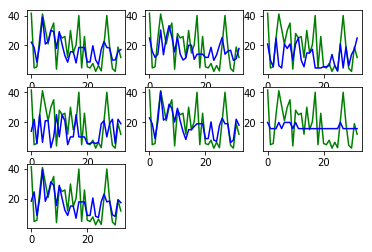

In [274]:
import matplotlib.pyplot as plt

x = test_labels
y = [predictions,lmpredictions,logregpredictions,svmpredictions,etrpredictions,lassopredictions,predicted]
fig = plt.figure()

plt.subplot(3, 3, 1)
plt.plot(x, color='green')
plt.plot(y[0], color='blue')


plt.subplot(3, 3, 2)
plt.plot(x, color='green')
plt.plot(y[1], color='blue')


plt.subplot(3, 3, 3)
plt.plot(x, color='green')
plt.plot(y[2], color='blue')


plt.subplot(3, 3, 4)
plt.plot(x, color='green')
plt.plot(y[3], color='blue')

plt.subplot(3, 3, 5)
plt.plot(x, color='green')
plt.plot(y[4], color='blue')

plt.subplot(3, 3, 6)
plt.plot(x, color='green')
plt.plot(y[5], color='blue')

plt.subplot(3, 3, 7)
plt.plot(x, color='green')
plt.plot(y[6], color='blue')
 
plt.show()



In [275]:
wednesdayCompare

,Model Name,MAE
0,Random Forest,7.626297
1,Linear Regression,9.808929
2,Logistic Regression,9.006061
3,Support Vector Machine,10.693939
4,Principal Component Analysis,7.160278
5,Lasso Regression,10.467656
6,Gradient Boosting Machine,7.918453


In [276]:
wednesdayBestMAE = wednesdayCompare['MAE'].min()
#BestMAE

In [277]:
wednesdaybestrow = wednesdayCompare.index[wednesdayCompare['MAE'] == wednesdayBestMAE]
#bestrow

In [278]:
wednesdaybestmodel = wednesdayCompare.iloc[wednesdaybestrow,0]
#bestmodel
#print('Best Model for Prediction is',bestmodel)

# Thursday

In [279]:
features = thursday

In [280]:
# Using numpy to convert to arrays
# Labels are the values we want to predict
labels = np.array(features['quantity'])

In [281]:
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('quantity', axis = 1)

In [282]:
# Saving feature names for later use
feature_list = list(features.columns)

In [283]:
# Convert to numpy array
features = np.array(features)

In [284]:
#labels

In [285]:
#features

In [286]:
# Using Skicit-learn to split data into training and testing sets

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25,
                                                                           random_state = 42)

In [287]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (105, 16)
Training Labels Shape: (105,)
Testing Features Shape: (35, 16)
Testing Labels Shape: (35,)


## Random Forest

In [288]:
# Instantiate model 
rf = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Train the model on training data
rf.fit(train_features, train_labels);

In [289]:
#train_features.dtype

In [290]:
#train_labels.dtype

In [291]:
rf_new = RandomForestRegressor(n_estimators = 100, criterion = 'mse', max_depth = None, 
                               min_samples_split = 2, min_samples_leaf = 1)

In [292]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

In [293]:
# Calculate the absolute errors
errors = abs(predictions - test_labels)

In [294]:
# Print out the mean absolute error (mae)
#print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

In [295]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)

In [296]:
rfer = mean_absolute_error(test_labels, predictions)

In [297]:
#rfer

In [298]:
#Compare

In [299]:
thursdayCompare.loc[0] = ['Random Forest', rfer]

In [300]:
#Compare

In [301]:
## The line / model
#plt.scatter(test_labels, predictions)



In [302]:
'''plt.plot(test_labels, color='green')
plt.plot(predictions, color='blue')

plt.show()'''

"plt.plot(test_labels, color='green')\nplt.plot(predictions, color='blue')\n\nplt.show()"

## Linear Regression

In [303]:
lm = LinearRegression()

In [304]:
lm.fit(train_features,train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [305]:
lmpredictions = lm.predict(test_features)

In [306]:
lnrer = mean_absolute_error(test_labels, lmpredictions)
#lnrer

In [307]:
thursdayCompare.loc[1] = ['Linear Regression', lnrer]
#Compare

In [308]:
#plt.scatter(test_labels,lmpredictions)

In [309]:
'''plt.plot(test_labels, color='green')
plt.plot(lmpredictions, color='blue')

plt.show()'''

"plt.plot(test_labels, color='green')\nplt.plot(lmpredictions, color='blue')\n\nplt.show()"

## Logistic Regression

In [310]:
logreg = LogisticRegression()

In [311]:
#train_labels

In [312]:
lab_enc = preprocessing.LabelEncoder()
train_labels_encoded = lab_enc.fit_transform(train_labels)
'''print(train_labels_encoded)
print(utils.multiclass.type_of_target(train_labels))
print(utils.multiclass.type_of_target(train_labels.astype('int')))
print(utils.multiclass.type_of_target(train_labels_encoded))'''

"print(train_labels_encoded)\nprint(utils.multiclass.type_of_target(train_labels))\nprint(utils.multiclass.type_of_target(train_labels.astype('int')))\nprint(utils.multiclass.type_of_target(train_labels_encoded))"

In [313]:
logreg.fit(train_features,train_labels_encoded)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [314]:
logregpredictions = logreg.predict(test_features)

In [315]:
logregpredictions = list(lab_enc.inverse_transform(logregpredictions))

In [316]:
lgrer = mean_absolute_error(test_labels, logregpredictions)
#lgrer

In [317]:
thursdayCompare.loc[2] = ['Logistic Regression', lgrer]
#Compare

In [318]:
'''plt.plot(test_labels, color='green')
plt.plot(logregpredictions, color='blue')

plt.show()'''

"plt.plot(test_labels, color='green')\nplt.plot(logregpredictions, color='blue')\n\nplt.show()"

## Support Vector Machine

In [319]:
svmm = svm.SVC()

In [320]:
lab_enc = preprocessing.LabelEncoder()
train_labels_encoded = lab_enc.fit_transform(train_labels)
'''print(utils.multiclass.type_of_target(train_labels))
print(utils.multiclass.type_of_target(train_labels.astype('int')))
print(utils.multiclass.type_of_target(train_labels_encoded))'''

"print(utils.multiclass.type_of_target(train_labels))\nprint(utils.multiclass.type_of_target(train_labels.astype('int')))\nprint(utils.multiclass.type_of_target(train_labels_encoded))"

In [321]:
svmm.fit(train_features,train_labels_encoded)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [322]:
svmpredictions = svmm.predict(test_features)

In [323]:
svmpredictions = list(lab_enc.inverse_transform(svmpredictions))

In [324]:
svmer = mean_absolute_error(test_labels, svmpredictions)
#svmer

In [325]:
thursdayCompare.loc[3] = ['Support Vector Machine', svmer]
#Compare

In [326]:
'''plt.plot(test_labels, color='green')
plt.plot(svmpredictions, color='blue')

plt.show()'''

"plt.plot(test_labels, color='green')\nplt.plot(svmpredictions, color='blue')\n\nplt.show()"

## Principal Component Analysis

In [327]:
pca = PCA()
regr = LinearRegression()

In [328]:
model = LinearRegression()
rfe = RFE(model,3)

In [329]:
fit_model=rfe.fit(train_features,train_labels)
#print(fit_model.get_support())

In [330]:
model = ExtraTreesRegressor()
model.fit(train_features,train_labels)
#print(model.feature_importances_)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [331]:
 etrpredictions= model.predict(test_features)

In [332]:
etrer = mean_absolute_error(test_labels, etrpredictions)
#etrer

In [333]:
thursdayCompare.loc[4] = ['Principal Component Analysis', etrer]
#Compare

In [334]:
#plt.scatter(test_labels,etrpredictions)

In [335]:
'''plt.plot(test_labels, color='green')
plt.plot(etrpredictions, color='blue')

plt.show()'''

"plt.plot(test_labels, color='green')\nplt.plot(etrpredictions, color='blue')\n\nplt.show()"

## Lasso Regression

In [336]:
# Lasso regression object
lasso = Lasso(alpha = 0.4, normalize = True)



In [337]:
# Fit to data
lasso.fit(train_features,train_labels)



Lasso(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [338]:
lassopredictions= lasso.predict(test_features)

In [339]:
lsrer = mean_absolute_error(test_labels, lassopredictions)
#lsrer

In [340]:
thursdayCompare.loc[5] = ['Lasso Regression', lsrer]
#Compare

In [341]:
#plt.scatter(test_labels,lassopredictions)

## Gradient Boosted Regressor

In [342]:
gbrclf = GradientBoostingRegressor()
gbrclf.fit(train_features,train_labels)




GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [343]:
predicted = gbrclf.predict(test_features)
expected = test_labels




In [344]:
gbmer = mean_absolute_error(test_labels, predicted)
#gbmer

In [345]:
thursdayCompare.loc[6] = ['Gradient Boosting Machine', gbmer]
#Compare

In [346]:
'''plt.figure(figsize=(4, 3))
plt.scatter(expected, predicted)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True quantity in lbs')
plt.ylabel('Predicted Quantity in lbs')
plt.tight_layout()'''

"plt.figure(figsize=(4, 3))\nplt.scatter(expected, predicted)\nplt.plot([0, 50], [0, 50], '--k')\nplt.axis('tight')\nplt.xlabel('True quantity in lbs')\nplt.ylabel('Predicted Quantity in lbs')\nplt.tight_layout()"

In [347]:
#plt.scatter(test_labels,predicted)

In [348]:
'''plt.plot(test_labels, color='green')
plt.plot(predicted, color='blue')

plt.show()'''

"plt.plot(test_labels, color='green')\nplt.plot(predicted, color='blue')\n\nplt.show()"

# Model Comparison

In [349]:
#Compare

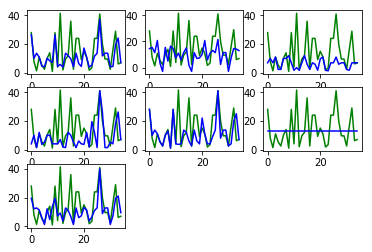

In [350]:
import matplotlib.pyplot as plt

x = test_labels
y = [predictions,lmpredictions,logregpredictions,svmpredictions,etrpredictions,lassopredictions,predicted]
fig = plt.figure()

plt.subplot(3, 3, 1)
plt.plot(x, color='green')
plt.plot(y[0], color='blue')


plt.subplot(3, 3, 2)
plt.plot(x, color='green')
plt.plot(y[1], color='blue')


plt.subplot(3, 3, 3)
plt.plot(x, color='green')
plt.plot(y[2], color='blue')


plt.subplot(3, 3, 4)
plt.plot(x, color='green')
plt.plot(y[3], color='blue')

plt.subplot(3, 3, 5)
plt.plot(x, color='green')
plt.plot(y[4], color='blue')

plt.subplot(3, 3, 6)
plt.plot(x, color='green')
plt.plot(y[5], color='blue')

plt.subplot(3, 3, 7)
plt.plot(x, color='green')
plt.plot(y[6], color='blue')
 
plt.show()



In [351]:
thursdayCompare

,Model Name,MAE
0,Random Forest,6.425742
1,Linear Regression,9.647459
2,Logistic Regression,8.877143
3,Support Vector Machine,8.891429
4,Principal Component Analysis,6.233233
5,Lasso Regression,9.280190
6,Gradient Boosting Machine,7.102441


In [352]:
thursdayBestMAE = thursdayCompare['MAE'].min()
#BestMAE

In [353]:
thursdaybestrow = thursdayCompare.index[thursdayCompare['MAE'] == thursdayBestMAE]
#bestrow

In [354]:
thursdaybestmodel = thursdayCompare.iloc[thursdaybestrow,0]
#bestmodel
#print('Best Model for Prediction is',bestmodel)

# Friday

In [355]:
features = friday

In [356]:
# Using numpy to convert to arrays
# Labels are the values we want to predict
labels = np.array(features['quantity'])

In [357]:
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('quantity', axis = 1)

In [358]:
# Saving feature names for later use
feature_list = list(features.columns)

In [359]:
# Convert to numpy array
features = np.array(features)

In [360]:
#labels

In [361]:
#features

In [362]:
# Using Skicit-learn to split data into training and testing sets

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25,
                                                                           random_state = 42)

In [363]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (60, 16)
Training Labels Shape: (60,)
Testing Features Shape: (21, 16)
Testing Labels Shape: (21,)


## Random Forest

In [364]:
# Instantiate model 
rf = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Train the model on training data
rf.fit(train_features, train_labels);

In [365]:
#train_features.dtype

In [366]:
#train_labels.dtype

In [367]:
rf_new = RandomForestRegressor(n_estimators = 100, criterion = 'mse', max_depth = None, 
                               min_samples_split = 2, min_samples_leaf = 1)

In [368]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

In [369]:
# Calculate the absolute errors
errors = abs(predictions - test_labels)

In [370]:
# Print out the mean absolute error (mae)
#print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

In [371]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)

In [372]:
rfer = mean_absolute_error(test_labels, predictions)

In [373]:
#rfer

In [374]:
#Compare

In [375]:
fridayCompare.loc[0] = ['Random Forest', rfer]

In [376]:
#Compare

In [377]:
## The line / model
#plt.scatter(test_labels, predictions)



In [378]:
'''plt.plot(test_labels, color='green')
plt.plot(predictions, color='blue')

plt.show()'''

"plt.plot(test_labels, color='green')\nplt.plot(predictions, color='blue')\n\nplt.show()"

## Linear Regression

In [379]:
lm = LinearRegression()

In [380]:
lm.fit(train_features,train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [381]:
lmpredictions = lm.predict(test_features)

In [382]:
lnrer = mean_absolute_error(test_labels, lmpredictions)
#lnrer

In [383]:
fridayCompare.loc[1] = ['Linear Regression', lnrer]
#Compare

In [384]:
#plt.scatter(test_labels,lmpredictions)

In [385]:
'''plt.plot(test_labels, color='green')
plt.plot(lmpredictions, color='blue')

plt.show()'''

"plt.plot(test_labels, color='green')\nplt.plot(lmpredictions, color='blue')\n\nplt.show()"

## Logistic Regression

In [386]:
logreg = LogisticRegression()

In [387]:
#train_labels

In [388]:
lab_enc = preprocessing.LabelEncoder()
train_labels_encoded = lab_enc.fit_transform(train_labels)
'''print(train_labels_encoded)
print(utils.multiclass.type_of_target(train_labels))
print(utils.multiclass.type_of_target(train_labels.astype('int')))
print(utils.multiclass.type_of_target(train_labels_encoded))'''

"print(train_labels_encoded)\nprint(utils.multiclass.type_of_target(train_labels))\nprint(utils.multiclass.type_of_target(train_labels.astype('int')))\nprint(utils.multiclass.type_of_target(train_labels_encoded))"

In [389]:
logreg.fit(train_features,train_labels_encoded)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [390]:
logregpredictions = logreg.predict(test_features)

In [391]:
logregpredictions = list(lab_enc.inverse_transform(logregpredictions))

In [392]:
lgrer = mean_absolute_error(test_labels, logregpredictions)
#lgrer

In [393]:
fridayCompare.loc[2] = ['Logistic Regression', lgrer]
#Compare

In [394]:
'''plt.plot(test_labels, color='green')
plt.plot(logregpredictions, color='blue')

plt.show()'''

"plt.plot(test_labels, color='green')\nplt.plot(logregpredictions, color='blue')\n\nplt.show()"

## Support Vector Machine

In [395]:
svmm = svm.SVC()

In [396]:
lab_enc = preprocessing.LabelEncoder()
train_labels_encoded = lab_enc.fit_transform(train_labels)
'''print(utils.multiclass.type_of_target(train_labels))
print(utils.multiclass.type_of_target(train_labels.astype('int')))
print(utils.multiclass.type_of_target(train_labels_encoded))'''

"print(utils.multiclass.type_of_target(train_labels))\nprint(utils.multiclass.type_of_target(train_labels.astype('int')))\nprint(utils.multiclass.type_of_target(train_labels_encoded))"

In [397]:
svmm.fit(train_features,train_labels_encoded)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [398]:
svmpredictions = svmm.predict(test_features)

In [399]:
svmpredictions = list(lab_enc.inverse_transform(svmpredictions))

In [400]:
svmer = mean_absolute_error(test_labels, svmpredictions)
#svmer

In [401]:
fridayCompare.loc[3] = ['Support Vector Machine', svmer]
#Compare

In [402]:
'''plt.plot(test_labels, color='green')
plt.plot(svmpredictions, color='blue')

plt.show()'''

"plt.plot(test_labels, color='green')\nplt.plot(svmpredictions, color='blue')\n\nplt.show()"

## Principal Component Analysis

In [403]:
pca = PCA()
regr = LinearRegression()

In [404]:
model = LinearRegression()
rfe = RFE(model,3)

In [405]:
fit_model=rfe.fit(train_features,train_labels)
#print(fit_model.get_support())

In [406]:
model = ExtraTreesRegressor()
model.fit(train_features,train_labels)
#print(model.feature_importances_)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [407]:
 etrpredictions= model.predict(test_features)

In [408]:
etrer = mean_absolute_error(test_labels, etrpredictions)
#etrer

In [409]:
fridayCompare.loc[4] = ['Principal Component Analysis', etrer]
#Compare

In [410]:
#plt.scatter(test_labels,etrpredictions)

In [411]:
'''plt.plot(test_labels, color='green')
plt.plot(etrpredictions, color='blue')

plt.show()'''

"plt.plot(test_labels, color='green')\nplt.plot(etrpredictions, color='blue')\n\nplt.show()"

## Lasso Regression

In [412]:
# Lasso regression object
lasso = Lasso(alpha = 0.4, normalize = True)



In [413]:
# Fit to data
lasso.fit(train_features,train_labels)



Lasso(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [414]:
lassopredictions= lasso.predict(test_features)

In [415]:
lsrer = mean_absolute_error(test_labels, lassopredictions)
#lsrer

In [416]:
fridayCompare.loc[5] = ['Lasso Regression', lsrer]
#Compare

In [417]:
#plt.scatter(test_labels,lassopredictions)

## Gradient Boosted Regressor

In [418]:
gbrclf = GradientBoostingRegressor()
gbrclf.fit(train_features,train_labels)




GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [419]:
predicted = gbrclf.predict(test_features)
expected = test_labels




In [420]:
gbmer = mean_absolute_error(test_labels, predicted)
#gbmer

In [421]:
fridayCompare.loc[6] = ['Gradient Boosting Machine', gbmer]
#Compare

In [422]:
'''plt.figure(figsize=(4, 3))
plt.scatter(expected, predicted)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True quantity in lbs')
plt.ylabel('Predicted Quantity in lbs')
plt.tight_layout()'''

"plt.figure(figsize=(4, 3))\nplt.scatter(expected, predicted)\nplt.plot([0, 50], [0, 50], '--k')\nplt.axis('tight')\nplt.xlabel('True quantity in lbs')\nplt.ylabel('Predicted Quantity in lbs')\nplt.tight_layout()"

In [423]:
#plt.scatter(test_labels,predicted)

In [424]:
'''plt.plot(test_labels, color='green')
plt.plot(predicted, color='blue')

plt.show()'''

"plt.plot(test_labels, color='green')\nplt.plot(predicted, color='blue')\n\nplt.show()"

# Model Comparison

In [425]:
#Compare

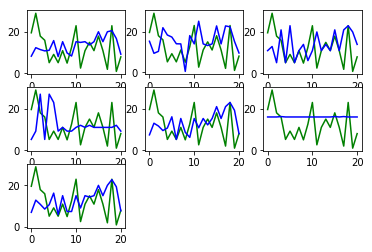

In [426]:
import matplotlib.pyplot as plt

x = test_labels
y = [predictions,lmpredictions,logregpredictions,svmpredictions,etrpredictions,lassopredictions,predicted]
fig = plt.figure()

plt.subplot(3, 3, 1)
plt.plot(x, color='green')
plt.plot(y[0], color='blue')


plt.subplot(3, 3, 2)
plt.plot(x, color='green')
plt.plot(y[1], color='blue')


plt.subplot(3, 3, 3)
plt.plot(x, color='green')
plt.plot(y[2], color='blue')


plt.subplot(3, 3, 4)
plt.plot(x, color='green')
plt.plot(y[3], color='blue')

plt.subplot(3, 3, 5)
plt.plot(x, color='green')
plt.plot(y[4], color='blue')

plt.subplot(3, 3, 6)
plt.plot(x, color='green')
plt.plot(y[5], color='blue')

plt.subplot(3, 3, 7)
plt.plot(x, color='green')
plt.plot(y[6], color='blue')
 
plt.show()



In [427]:
fridayCompare

,Model Name,MAE
0,Random Forest,6.778800
1,Linear Regression,7.852055
2,Logistic Regression,7.095238
3,Support Vector Machine,7.895238
4,Principal Component Analysis,6.643832
5,Lasso Regression,7.101758
6,Gradient Boosting Machine,6.397618


In [428]:
fridayBestMAE = fridayCompare['MAE'].min()
#BestMAE

In [429]:
fridaybestrow = fridayCompare.index[fridayCompare['MAE'] == fridayBestMAE]
#bestrow

In [430]:
fridaybestmodel = fridayCompare.iloc[fridaybestrow,0]
#bestmodel
#print('Best Model for Prediction is',bestmodel)

# Saturday

In [431]:
features = saturday

In [432]:
# Using numpy to convert to arrays
# Labels are the values we want to predict
labels = np.array(features['quantity'])

In [433]:
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('quantity', axis = 1)

In [434]:
# Saving feature names for later use
feature_list = list(features.columns)

In [435]:
# Convert to numpy array
features = np.array(features)

In [436]:
#labels

In [437]:
#features

In [438]:
# Using Skicit-learn to split data into training and testing sets

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25,
                                                                           random_state = 42)

In [439]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (18, 16)
Training Labels Shape: (18,)
Testing Features Shape: (7, 16)
Testing Labels Shape: (7,)


## Random Forest

In [440]:
# Instantiate model 
rf = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Train the model on training data
rf.fit(train_features, train_labels);

In [441]:
#train_features.dtype

In [442]:
#train_labels.dtype

In [443]:
rf_new = RandomForestRegressor(n_estimators = 100, criterion = 'mse', max_depth = None, 
                               min_samples_split = 2, min_samples_leaf = 1)

In [444]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

In [445]:
# Calculate the absolute errors
errors = abs(predictions - test_labels)

In [446]:
# Print out the mean absolute error (mae)
#print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

In [447]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)

In [448]:
rfer = mean_absolute_error(test_labels, predictions)

In [449]:
#rfer

In [450]:
#Compare

In [451]:
saturdayCompare.loc[0] = ['Random Forest', rfer]

In [452]:
#Compare

In [453]:
## The line / model
#plt.scatter(test_labels, predictions)



In [454]:
'''plt.plot(test_labels, color='green')
plt.plot(predictions, color='blue')

plt.show()'''

"plt.plot(test_labels, color='green')\nplt.plot(predictions, color='blue')\n\nplt.show()"

## Linear Regression

In [455]:
lm = LinearRegression()

In [456]:
lm.fit(train_features,train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [457]:
lmpredictions = lm.predict(test_features)

In [458]:
lnrer = mean_absolute_error(test_labels, lmpredictions)
#lnrer

In [459]:
saturdayCompare.loc[1] = ['Linear Regression', lnrer]
#Compare

In [460]:
#plt.scatter(test_labels,lmpredictions)

In [461]:
'''plt.plot(test_labels, color='green')
plt.plot(lmpredictions, color='blue')

plt.show()'''

"plt.plot(test_labels, color='green')\nplt.plot(lmpredictions, color='blue')\n\nplt.show()"

## Logistic Regression

In [462]:
logreg = LogisticRegression()

In [463]:
#train_labels

In [464]:
lab_enc = preprocessing.LabelEncoder()
train_labels_encoded = lab_enc.fit_transform(train_labels)
'''print(train_labels_encoded)
print(utils.multiclass.type_of_target(train_labels))
print(utils.multiclass.type_of_target(train_labels.astype('int')))
print(utils.multiclass.type_of_target(train_labels_encoded))'''

"print(train_labels_encoded)\nprint(utils.multiclass.type_of_target(train_labels))\nprint(utils.multiclass.type_of_target(train_labels.astype('int')))\nprint(utils.multiclass.type_of_target(train_labels_encoded))"

In [465]:
logreg.fit(train_features,train_labels_encoded)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [466]:
logregpredictions = logreg.predict(test_features)

In [467]:
logregpredictions = list(lab_enc.inverse_transform(logregpredictions))

In [468]:
lgrer = mean_absolute_error(test_labels, logregpredictions)
#lgrer

In [469]:
saturdayCompare.loc[2] = ['Logistic Regression', lgrer]
#Compare

In [470]:
'''plt.plot(test_labels, color='green')
plt.plot(logregpredictions, color='blue')

plt.show()'''

"plt.plot(test_labels, color='green')\nplt.plot(logregpredictions, color='blue')\n\nplt.show()"

## Support Vector Machine

In [471]:
svmm = svm.SVC()

In [472]:
lab_enc = preprocessing.LabelEncoder()
train_labels_encoded = lab_enc.fit_transform(train_labels)
'''print(utils.multiclass.type_of_target(train_labels))
print(utils.multiclass.type_of_target(train_labels.astype('int')))
print(utils.multiclass.type_of_target(train_labels_encoded))'''

"print(utils.multiclass.type_of_target(train_labels))\nprint(utils.multiclass.type_of_target(train_labels.astype('int')))\nprint(utils.multiclass.type_of_target(train_labels_encoded))"

In [473]:
svmm.fit(train_features,train_labels_encoded)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [474]:
svmpredictions = svmm.predict(test_features)

In [475]:
svmpredictions = list(lab_enc.inverse_transform(svmpredictions))

In [476]:
svmer = mean_absolute_error(test_labels, svmpredictions)
#svmer

In [477]:
saturdayCompare.loc[3] = ['Support Vector Machine', svmer]
#Compare

In [478]:
'''plt.plot(test_labels, color='green')
plt.plot(svmpredictions, color='blue')

plt.show()'''

"plt.plot(test_labels, color='green')\nplt.plot(svmpredictions, color='blue')\n\nplt.show()"

## Principal Component Analysis

In [479]:
pca = PCA()
regr = LinearRegression()

In [480]:
model = LinearRegression()
rfe = RFE(model,3)

In [481]:
fit_model=rfe.fit(train_features,train_labels)
#print(fit_model.get_support())

In [482]:
model = ExtraTreesRegressor()
model.fit(train_features,train_labels)
#print(model.feature_importances_)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [483]:
 etrpredictions= model.predict(test_features)

In [484]:
etrer = mean_absolute_error(test_labels, etrpredictions)
#etrer

In [485]:
saturdayCompare.loc[4] = ['Principal Component Analysis', etrer]
#Compare

In [486]:
#plt.scatter(test_labels,etrpredictions)

In [487]:
'''plt.plot(test_labels, color='green')
plt.plot(etrpredictions, color='blue')

plt.show()'''

"plt.plot(test_labels, color='green')\nplt.plot(etrpredictions, color='blue')\n\nplt.show()"

## Lasso Regression

In [488]:
# Lasso regression object
lasso = Lasso(alpha = 0.4, normalize = True)



In [489]:
# Fit to data
lasso.fit(train_features,train_labels)



Lasso(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [490]:
lassopredictions= lasso.predict(test_features)

In [491]:
lsrer = mean_absolute_error(test_labels, lassopredictions)
#lsrer

In [492]:
saturdayCompare.loc[5] = ['Lasso Regression', lsrer]
#Compare

In [493]:
#plt.scatter(test_labels,lassopredictions)

## Gradient Boosted Regressor

In [494]:
gbrclf = GradientBoostingRegressor()
gbrclf.fit(train_features,train_labels)




GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [495]:
predicted = gbrclf.predict(test_features)
expected = test_labels




In [496]:
gbmer = mean_absolute_error(test_labels, predicted)
#gbmer

In [497]:
saturdayCompare.loc[6] = ['Gradient Boosting Machine', gbmer]
#Compare

In [498]:
'''plt.figure(figsize=(4, 3))
plt.scatter(expected, predicted)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True quantity in lbs')
plt.ylabel('Predicted Quantity in lbs')
plt.tight_layout()'''

"plt.figure(figsize=(4, 3))\nplt.scatter(expected, predicted)\nplt.plot([0, 50], [0, 50], '--k')\nplt.axis('tight')\nplt.xlabel('True quantity in lbs')\nplt.ylabel('Predicted Quantity in lbs')\nplt.tight_layout()"

In [499]:
#plt.scatter(test_labels,predicted)

In [500]:
'''plt.plot(test_labels, color='green')
plt.plot(predicted, color='blue')

plt.show()'''

"plt.plot(test_labels, color='green')\nplt.plot(predicted, color='blue')\n\nplt.show()"

# Model Comparison

In [501]:
#Compare

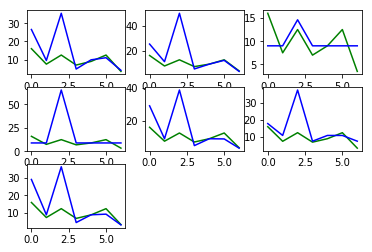

In [502]:
import matplotlib.pyplot as plt

x = test_labels
y = [predictions,lmpredictions,logregpredictions,svmpredictions,etrpredictions,lassopredictions,predicted]
fig = plt.figure()

plt.subplot(3, 3, 1)
plt.plot(x, color='green')
plt.plot(y[0], color='blue')


plt.subplot(3, 3, 2)
plt.plot(x, color='green')
plt.plot(y[1], color='blue')


plt.subplot(3, 3, 3)
plt.plot(x, color='green')
plt.plot(y[2], color='blue')


plt.subplot(3, 3, 4)
plt.plot(x, color='green')
plt.plot(y[3], color='blue')

plt.subplot(3, 3, 5)
plt.plot(x, color='green')
plt.plot(y[4], color='blue')

plt.subplot(3, 3, 6)
plt.plot(x, color='green')
plt.plot(y[5], color='blue')

plt.subplot(3, 3, 7)
plt.plot(x, color='green')
plt.plot(y[6], color='blue')
 
plt.show()



In [503]:
saturdayCompare

,Model Name,MAE
0,Random Forest,5.812085
1,Linear Regression,7.596778
2,Logistic Regression,3.085714
3,Support Vector Machine,10.285714
4,Principal Component Analysis,6.702857
5,Lasso Regression,5.459541
6,Gradient Boosting Machine,6.273108


In [504]:
saturdayBestMAE = saturdayCompare['MAE'].min()
#BestMAE

In [505]:
saturdaybestrow = saturdayCompare.index[saturdayCompare['MAE'] == saturdayBestMAE]
#bestrow

In [506]:
saturdaybestmodel = saturdayCompare.iloc[saturdaybestrow,0]
#bestmodel
#print('Best Model for Prediction is',bestmodel)

# Sunday

In [507]:
features = sunday

In [508]:
# Using numpy to convert to arrays
# Labels are the values we want to predict
labels = np.array(features['quantity'])

In [509]:
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('quantity', axis = 1)

In [510]:
# Saving feature names for later use
feature_list = list(features.columns)

In [511]:
# Convert to numpy array
features = np.array(features)

In [512]:
#labels

In [513]:
#features

In [514]:
# Using Skicit-learn to split data into training and testing sets

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25,
                                                                           random_state = 42)

In [515]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (66, 16)
Training Labels Shape: (66,)
Testing Features Shape: (23, 16)
Testing Labels Shape: (23,)


## Random Forest

In [516]:
# Instantiate model 
rf = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Train the model on training data
rf.fit(train_features, train_labels);

In [517]:
#train_features.dtype

In [518]:
#train_labels.dtype

In [519]:
rf_new = RandomForestRegressor(n_estimators = 100, criterion = 'mse', max_depth = None, 
                               min_samples_split = 2, min_samples_leaf = 1)

In [520]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

In [521]:
# Calculate the absolute errors
errors = abs(predictions - test_labels)

In [522]:
# Print out the mean absolute error (mae)
#print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

In [523]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)

In [524]:
rfer = mean_absolute_error(test_labels, predictions)

In [525]:
#rfer

In [526]:
#Compare

In [527]:
sundayCompare.loc[0] = ['Random Forest', rfer]

In [528]:
#Compare

In [529]:
## The line / model
#plt.scatter(test_labels, predictions)



In [530]:
'''plt.plot(test_labels, color='green')
plt.plot(predictions, color='blue')

plt.show()'''

"plt.plot(test_labels, color='green')\nplt.plot(predictions, color='blue')\n\nplt.show()"

## Linear Regression

In [531]:
lm = LinearRegression()

In [532]:
lm.fit(train_features,train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [533]:
lmpredictions = lm.predict(test_features)

In [534]:
lnrer = mean_absolute_error(test_labels, lmpredictions)
#lnrer

In [535]:
sundayCompare.loc[1] = ['Linear Regression', lnrer]
#Compare

In [536]:
#plt.scatter(test_labels,lmpredictions)

In [537]:
'''plt.plot(test_labels, color='green')
plt.plot(lmpredictions, color='blue')

plt.show()'''

"plt.plot(test_labels, color='green')\nplt.plot(lmpredictions, color='blue')\n\nplt.show()"

## Logistic Regression

In [538]:
logreg = LogisticRegression()

In [539]:
#train_labels

In [540]:
lab_enc = preprocessing.LabelEncoder()
train_labels_encoded = lab_enc.fit_transform(train_labels)
'''print(train_labels_encoded)
print(utils.multiclass.type_of_target(train_labels))
print(utils.multiclass.type_of_target(train_labels.astype('int')))
print(utils.multiclass.type_of_target(train_labels_encoded))'''

"print(train_labels_encoded)\nprint(utils.multiclass.type_of_target(train_labels))\nprint(utils.multiclass.type_of_target(train_labels.astype('int')))\nprint(utils.multiclass.type_of_target(train_labels_encoded))"

In [541]:
logreg.fit(train_features,train_labels_encoded)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [542]:
logregpredictions = logreg.predict(test_features)

In [543]:
logregpredictions = list(lab_enc.inverse_transform(logregpredictions))

In [544]:
lgrer = mean_absolute_error(test_labels, logregpredictions)
#lgrer

In [545]:
sundayCompare.loc[2] = ['Logistic Regression', lgrer]
#Compare

In [546]:
'''plt.plot(test_labels, color='green')
plt.plot(logregpredictions, color='blue')

plt.show()'''

"plt.plot(test_labels, color='green')\nplt.plot(logregpredictions, color='blue')\n\nplt.show()"

## Support Vector Machine

In [547]:
svmm = svm.SVC()

In [548]:
lab_enc = preprocessing.LabelEncoder()
train_labels_encoded = lab_enc.fit_transform(train_labels)
'''print(utils.multiclass.type_of_target(train_labels))
print(utils.multiclass.type_of_target(train_labels.astype('int')))
print(utils.multiclass.type_of_target(train_labels_encoded))'''

"print(utils.multiclass.type_of_target(train_labels))\nprint(utils.multiclass.type_of_target(train_labels.astype('int')))\nprint(utils.multiclass.type_of_target(train_labels_encoded))"

In [549]:
svmm.fit(train_features,train_labels_encoded)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [550]:
svmpredictions = svmm.predict(test_features)

In [551]:
svmpredictions = list(lab_enc.inverse_transform(svmpredictions))

In [552]:
svmer = mean_absolute_error(test_labels, svmpredictions)
#svmer

In [553]:
sundayCompare.loc[3] = ['Support Vector Machine', svmer]
#Compare

In [554]:
'''plt.plot(test_labels, color='green')
plt.plot(svmpredictions, color='blue')

plt.show()'''

"plt.plot(test_labels, color='green')\nplt.plot(svmpredictions, color='blue')\n\nplt.show()"

## Principal Component Analysis

In [555]:
pca = PCA()
regr = LinearRegression()

In [556]:
model = LinearRegression()
rfe = RFE(model,3)

In [557]:
fit_model=rfe.fit(train_features,train_labels)
#print(fit_model.get_support())

In [558]:
model = ExtraTreesRegressor()
model.fit(train_features,train_labels)
#print(model.feature_importances_)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [559]:
 etrpredictions= model.predict(test_features)

In [560]:
etrer = mean_absolute_error(test_labels, etrpredictions)
#etrer

In [561]:
sundayCompare.loc[4] = ['Principal Component Analysis', etrer]
#Compare

In [562]:
#plt.scatter(test_labels,etrpredictions)

In [563]:
'''plt.plot(test_labels, color='green')
plt.plot(etrpredictions, color='blue')

plt.show()'''

"plt.plot(test_labels, color='green')\nplt.plot(etrpredictions, color='blue')\n\nplt.show()"

## Lasso Regression

In [564]:
# Lasso regression object
lasso = Lasso(alpha = 0.4, normalize = True)



In [565]:
# Fit to data
lasso.fit(train_features,train_labels)



Lasso(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [566]:
lassopredictions= lasso.predict(test_features)

In [567]:
lsrer = mean_absolute_error(test_labels, lassopredictions)
#lsrer

In [568]:
sundayCompare.loc[5] = ['Lasso Regression', lsrer]
#Compare

In [569]:
#plt.scatter(test_labels,lassopredictions)

## Gradient Boosted Regressor

In [570]:
gbrclf = GradientBoostingRegressor()
gbrclf.fit(train_features,train_labels)




GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [571]:
predicted = gbrclf.predict(test_features)
expected = test_labels




In [572]:
gbmer = mean_absolute_error(test_labels, predicted)
#gbmer

In [573]:
sundayCompare.loc[6] = ['Gradient Boosting Machine', gbmer]
#Compare

In [574]:
'''plt.figure(figsize=(4, 3))
plt.scatter(expected, predicted)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True quantity in lbs')
plt.ylabel('Predicted Quantity in lbs')
plt.tight_layout()'''

"plt.figure(figsize=(4, 3))\nplt.scatter(expected, predicted)\nplt.plot([0, 50], [0, 50], '--k')\nplt.axis('tight')\nplt.xlabel('True quantity in lbs')\nplt.ylabel('Predicted Quantity in lbs')\nplt.tight_layout()"

In [575]:
#plt.scatter(test_labels,predicted)

In [576]:









'''plt.plot(test_labels, color='green')
plt.plot(predicted, color='blue')

plt.show()'''

"plt.plot(test_labels, color='green')\nplt.plot(predicted, color='blue')\n\nplt.show()"

# Model Comparison

In [577]:

#Compare

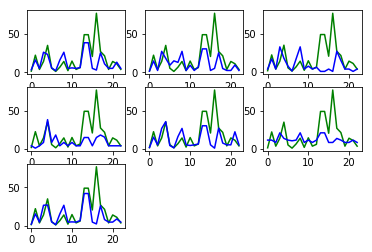

In [578]:
import matplotlib.pyplot as plt

x = test_labels
y = [predictions,lmpredictions,logregpredictions,svmpredictions,etrpredictions,lassopredictions,predicted]
fig = plt.figure()

plt.subplot(3, 3, 1)
plt.plot(x, color='green')
plt.plot(y[0], color='blue')


plt.subplot(3, 3, 2)
plt.plot(x, color='green')
plt.plot(y[1], color='blue')


plt.subplot(3, 3, 3)
plt.plot(x, color='green')
plt.plot(y[2], color='blue')


plt.subplot(3, 3, 4)
plt.plot(x, color='green')
plt.plot(y[3], color='blue')

plt.subplot(3, 3, 5)
plt.plot(x, color='green')
plt.plot(y[4], color='blue')

plt.subplot(3, 3, 6)
plt.plot(x, color='green')
plt.plot(y[5], color='blue')

plt.subplot(3, 3, 7)
plt.plot(x, color='green')
plt.plot(y[6], color='blue')
 
plt.show()



In [579]:
sundayCompare

,Model Name,MAE
0,Random Forest,8.958475
1,Linear Regression,10.683586
2,Logistic Regression,13.100000
3,Support Vector Machine,11.030435
4,Principal Component Analysis,9.824783
5,Lasso Regression,12.054067
6,Gradient Boosting Machine,8.582040


In [580]:
sundayBestMAE = sundayCompare['MAE'].min()
#BestMAE

In [581]:
sundaybestrow = sundayCompare.index[sundayCompare['MAE'] == sundayBestMAE]
#bestrow

In [582]:
sundaybestmodel = sundayCompare.iloc[sundaybestrow,0]
#bestmodel
#print('Best Model for Prediction is',bestmodel)


















## Creating new dataframe with future Inputs

In [583]:
futuredatabreakfast = pd.DataFrame(columns = ['itemname','mealtype'])
futuredatalunch = pd.DataFrame(columns = ['itemname','mealtype'])
futuredatadinner = pd.DataFrame(columns = ['itemname','mealtype'])

In [584]:
#futuredatabreakfast

In [585]:
#type(uniqueitems)

In [586]:
futuredatabreakfast['itemname']= uniqueitems
futuredatalunch['itemname']= uniqueitems
futuredatadinner['itemname']= uniqueitems

In [587]:

futuredatabreakfast['mealtype']= 'Breakfast'
futuredatalunch['mealtype']= 'Lunch'
futuredatadinner['mealtype']= 'Dinner'

In [588]:
#futuredatadinner

In [589]:
#datemaxordinal

In [590]:
#len(uniqueitems)

### Add three dataframe

In [591]:
futuredata = futuredatalunch.append(futuredatabreakfast, ignore_index=True)
futuredata = futuredata.append(futuredatadinner, ignore_index=True)

In [592]:
#futuredata

In [593]:
saves1 = futuredata['itemname']

In [594]:
mealtypelist1 = futuredata['mealtype']

In [595]:
'''mealtypelist = mealtypelist1.append(mealtypelist1, ignore_index=True)
mealtypelist = mealtypelist.append(mealtypelist1, ignore_index=True)
mealtypelist = mealtypelist.append(mealtypelist1, ignore_index=True)
mealtypelist = mealtypelist.append(mealtypelist1, ignore_index=True)
mealtypelist = mealtypelist.append(mealtypelist1, ignore_index=True)
mealtypelist = mealtypelist.append(mealtypelist1, ignore_index=True)'''

'mealtypelist = mealtypelist1.append(mealtypelist1, ignore_index=True)\nmealtypelist = mealtypelist.append(mealtypelist1, ignore_index=True)\nmealtypelist = mealtypelist.append(mealtypelist1, ignore_index=True)\nmealtypelist = mealtypelist.append(mealtypelist1, ignore_index=True)\nmealtypelist = mealtypelist.append(mealtypelist1, ignore_index=True)\nmealtypelist = mealtypelist.append(mealtypelist1, ignore_index=True)'

In [596]:
'''saves = saves1.append(saves1, ignore_index=True)
saves = saves.append(saves1, ignore_index=True)
saves = saves.append(saves1, ignore_index=True)
saves = saves.append(saves1, ignore_index=True)
saves = saves.append(saves1, ignore_index=True)
saves = saves.append(saves1, ignore_index=True)
saves'''

'saves = saves1.append(saves1, ignore_index=True)\nsaves = saves.append(saves1, ignore_index=True)\nsaves = saves.append(saves1, ignore_index=True)\nsaves = saves.append(saves1, ignore_index=True)\nsaves = saves.append(saves1, ignore_index=True)\nsaves = saves.append(saves1, ignore_index=True)\nsaves'

In [597]:
#One-hot encode categorical features
futuredata = pd.get_dummies(futuredata)

In [598]:
#futuredata

In [599]:
futuredata['date']= datemaxordinal+1

In [600]:
#futuredata

In [601]:
futuredata1 = futuredata.copy()
futuredata2 = futuredata.copy()
futuredata3 = futuredata.copy()
futuredata4 = futuredata.copy()
futuredata5 = futuredata.copy()
futuredata6 = futuredata.copy()
futuredata7 = futuredata.copy()

In [602]:
futuredata1['date']= mondaydatemaxordinal+7
futuredata1

,itemname_Catering,itemname_Deli,itemname_Dessert,itemname_Gluten Free,itemname_Grill,itemname_Hot Line,itemname_Pasta,itemname_Pizza,itemname_Post Consumer,itemname_Salad,itemname_Soup,itemname_Trim Waste,mealtype_Breakfast,mealtype_Dinner,mealtype_Lunch,date
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,148
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,148
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,148
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,148
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,148
5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,148
6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,148
7,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,148
8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,148
9,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,148


In [603]:
futuredata2['date']= tuesdaydatemaxordinal+7
#futuredata2

In [604]:
futuredata3['date']= wednesdaydatemaxordinal+7
#futuredata3

In [605]:
futuredata4['date']= thursdaydatemaxordinal+7
#futuredata4

In [606]:
futuredata5['date']= fridaydatemaxordinal+7
#futuredata5

In [607]:
futuredata6['date']= saturdaydatemaxordinal+7
#futuredata6

In [608]:
futuredata7['date']= sundaydatemaxordinal+7
#futuredata7

In [609]:
'''futuredata = futuredata1.append(futuredata2, ignore_index=True)
futuredata = futuredata.append(futuredata3, ignore_index=True)
futuredata = futuredata.append(futuredata4, ignore_index=True)
futuredata = futuredata.append(futuredata5, ignore_index=True)
futuredata = futuredata.append(futuredata6, ignore_index=True)
futuredata = futuredata.append(futuredata7, ignore_index=True)'''

'futuredata = futuredata1.append(futuredata2, ignore_index=True)\nfuturedata = futuredata.append(futuredata3, ignore_index=True)\nfuturedata = futuredata.append(futuredata4, ignore_index=True)\nfuturedata = futuredata.append(futuredata5, ignore_index=True)\nfuturedata = futuredata.append(futuredata6, ignore_index=True)\nfuturedata = futuredata.append(futuredata7, ignore_index=True)'

In [610]:
#futuredata

In [611]:
futurefeatures1 = np.array(futuredata1)

In [612]:
futurefeatures2 = np.array(futuredata1)
futurefeatures3 = np.array(futuredata2)
futurefeatures4 = np.array(futuredata3)
futurefeatures5 = np.array(futuredata4)
futurefeatures6 = np.array(futuredata5)
futurefeatures7 = np.array(futuredata6)

In [613]:
#print('Testing Features Shape:', futurefeatures.shape)

## Predicting Output with Best Model for Monday

In [614]:
if (mondaybestrow==[0]):
    newpredictions = rf.predict(futurefeatures1)
    

In [615]:
if (mondaybestrow == [1]):
    newpredictions = lm.predict(futurefeatures1)

In [616]:
if (mondaybestrow == [2]):
    newpredictions = logreg.predict(futurefeatures1)
    newpredictions = list(lab_enc.inverse_transform(newpredictions))

In [617]:
if (mondaybestrow == [3]):
    newpredictions= svmm.predict(futurefeatures1)
    newpredictions = list(lab_enc.inverse_transform(newpredictions))
    

In [618]:
if (mondaybestrow == [4]):
    newpredictions= model.predict(futurefeatures1)

In [619]:
if (mondaybestrow == [5]):
    newperdictions= lasso.predict(futurefeatures1)

In [620]:
if (mondaybestrow == [6]):
    newperdictions= gbrclf.predict(futurefeatures1)

In [621]:
futuredata1['predictions']= newpredictions

In [622]:
#futuredata

In [623]:
futuredata1['itemname']=saves1

In [624]:
futuredata1['mealtype']=mealtypelist1

In [625]:
#futuredata

In [626]:
futuredata1 = futuredata1[['itemname', 'mealtype','predictions','date']]

In [627]:
#futuredata

In [628]:
futuredata1['date'] = futuredata1['date'] + minmonord-1

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [629]:
futuredata1

,itemname,mealtype,predictions,date
0,Grill,Lunch,7.615815,736674
1,Hot Line,Lunch,8.629333,736674
2,Post Consumer,Lunch,6.304773,736674
3,Trim Waste,Lunch,7.615815,736674
4,Catering,Lunch,7.615815,736674
5,Dessert,Lunch,7.615815,736674
6,Deli,Lunch,15.822519,736674
7,Salad,Lunch,26.092410,736674
8,Pizza,Lunch,7.623815,736674
9,Pasta,Lunch,7.274443,736674


In [630]:
dateconvert = futuredata1['date']

In [631]:
#dateconvert

In [632]:
#len(dateconvert)

In [633]:
dateconverted = []
for i in range(len(dateconvert)):
    dateconverted.append(date.fromordinal(dateconvert[i]))

In [634]:
#dateconverted

In [635]:
futuredata1['date']= dateconverted

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [636]:
futuredata1

,itemname,mealtype,predictions,date
0,Grill,Lunch,7.615815,2017-12-11
1,Hot Line,Lunch,8.629333,2017-12-11
2,Post Consumer,Lunch,6.304773,2017-12-11
3,Trim Waste,Lunch,7.615815,2017-12-11
4,Catering,Lunch,7.615815,2017-12-11
5,Dessert,Lunch,7.615815,2017-12-11
6,Deli,Lunch,15.822519,2017-12-11
7,Salad,Lunch,26.092410,2017-12-11
8,Pizza,Lunch,7.623815,2017-12-11
9,Pasta,Lunch,7.274443,2017-12-11


In [637]:
uniqueitemsmean = []
for i in range(len(uniqueitems)):
    uniqueitemsmean.append((phooddata18cleanfiltercopy[phooddata18cleanfiltercopy.itemname==uniqueitems[i] ]).quantity.mean())

In [638]:
#uniqueitemsmean

In [639]:
uniqueitemsdf = pd.DataFrame(uniqueitems)
uniqueitemsdf.columns=['itemname']
#uniqueitemsdf

In [640]:
uniqueitemsdf['Mean']=uniqueitemsmean
#uniqueitemsdf

In [641]:
#len(futuredata)

In [642]:
futuredata1 = pd.merge(futuredata1, uniqueitemsdf, on='itemname', how='outer')
#futuredata

In [643]:
uniqueitemsmealmean = []
for i in range(len(uniqueitems)):
    for j in range(len(uniquemealtype)):
        uniqueitemsmealmean.append((phooddata18cleanfiltercopy[(phooddata18cleanfiltercopy.itemname==uniqueitems[i]) & (phooddata18cleanfiltercopy.mealtype==uniquemealtype[j])]).quantity.mean())

In [644]:
#uniqueitemsmealmean


In [645]:
futuredata1['Mean']=uniqueitemsmealmean
futuredata1['Risk 50%']=futuredata1['predictions']/2
futuredata1['Risk 20%']=futuredata1['predictions']/5
futuredata1['Risk 10%']=futuredata1['predictions']/10
#futuredata

In [646]:
futuredata1['Predicted Risk % of Mean'] = ((futuredata1['predictions'])/futuredata1['Mean'])*100
#futuredata

In [647]:
futuredata1['Minimum Savings(in $)']=futuredata1['predictions']*2
futuredata1['Maximum Savings(in $)']=futuredata1['predictions']*4
futuredata1

,itemname,mealtype,predictions,date,Mean,Risk 50%,Risk 20%,Risk 10%,Predicted Risk % of Mean,Minimum Savings(in $),Maximum Savings(in $)
0,Grill,Lunch,7.615815,2017-12-11,12.693182,3.807907,1.523163,0.761581,59.999257,15.231630,30.463259
1,Grill,Breakfast,5.161374,2017-12-11,14.013559,2.580687,1.032275,0.516137,36.831286,10.322748,20.645496
2,Grill,Dinner,9.172556,2017-12-11,11.776923,4.586278,1.834511,0.917256,77.885841,18.345111,36.690223
3,Hot Line,Lunch,8.629333,2017-12-11,17.370455,4.314666,1.725867,0.862933,49.678221,17.258666,34.517332
4,Hot Line,Breakfast,5.496024,2017-12-11,14.005556,2.748012,1.099205,0.549602,39.241742,10.992048,21.984096
5,Hot Line,Dinner,8.975142,2017-12-11,12.446939,4.487571,1.795028,0.897514,72.107223,17.950284,35.900567
6,Post Consumer,Lunch,6.304773,2017-12-11,25.501961,3.152386,1.260955,0.630477,24.722698,12.609546,25.219091
7,Post Consumer,Breakfast,4.729643,2017-12-11,23.619048,2.364822,0.945929,0.472964,20.024699,9.459286,18.918572
8,Post Consumer,Dinner,7.760587,2017-12-11,30.247059,3.880294,1.552117,0.776059,25.657329,15.521175,31.042350
9,Trim Waste,Lunch,7.615815,2017-12-11,11.852941,3.807907,1.523163,0.761581,64.252532,15.231630,30.463259


## Predicting Output with Best Model for Tuesday

In [648]:
if (tuesdaybestrow==[0]):
    newpredictions = rf.predict(futurefeatures2)
    

In [649]:
if (tuesdaybestrow == [1]):
    newpredictions = lm.predict(futurefeatures2)

In [650]:
if (tuesdaybestrow == [2]):
    newpredictions = logreg.predict(futurefeatures2)
    newpredictions = list(lab_enc.inverse_transform(newpredictions))

In [651]:
if (tuesdaybestrow == [3]):
    newpredictions= svmm.predict(futurefeatures2)
    newpredictions = list(lab_enc.inverse_transform(newpredictions))
    

In [652]:
if (tuesdaybestrow == [4]):
    newpredictions= model.predict(futurefeatures2)

In [653]:
if (tuesdaybestrow == [5]):
    newperdictions= lasso.predict(futurefeatures2)

In [654]:
if (tuesdaybestrow == [6]):
    newperdictions= gbrclf.predict(futurefeatures2)

In [655]:
futuredata2['predictions']= newpredictions

In [656]:
#futuredata

In [657]:
futuredata2['itemname']=saves1

In [658]:
futuredata2['mealtype']=mealtypelist1

In [659]:
#futuredata

In [660]:
futuredata2 = futuredata2[['itemname', 'mealtype','predictions','date']]

In [661]:
#futuredata

In [662]:
futuredata2['date'] = futuredata2['date'] + mintueord-1

In [663]:
futuredata2

,itemname,mealtype,predictions,date
0,Grill,Lunch,5.424000,736682
1,Hot Line,Lunch,16.000000,736682
2,Post Consumer,Lunch,1.400000,736682
3,Trim Waste,Lunch,5.424000,736682
4,Catering,Lunch,5.424000,736682
5,Dessert,Lunch,5.424000,736682
6,Deli,Lunch,5.424000,736682
7,Salad,Lunch,26.533333,736682
8,Pizza,Lunch,5.424000,736682
9,Pasta,Lunch,4.080000,736682


In [664]:
dateconvert = futuredata2['date']

In [665]:
#dateconvert

In [666]:
#len(dateconvert)

In [667]:
dateconverted = []
for i in range(len(dateconvert)):
    dateconverted.append(date.fromordinal(dateconvert[i]))

In [668]:
#dateconverted

In [669]:
futuredata2['date']= dateconverted

In [670]:
futuredata2

,itemname,mealtype,predictions,date
0,Grill,Lunch,5.424000,2017-12-19
1,Hot Line,Lunch,16.000000,2017-12-19
2,Post Consumer,Lunch,1.400000,2017-12-19
3,Trim Waste,Lunch,5.424000,2017-12-19
4,Catering,Lunch,5.424000,2017-12-19
5,Dessert,Lunch,5.424000,2017-12-19
6,Deli,Lunch,5.424000,2017-12-19
7,Salad,Lunch,26.533333,2017-12-19
8,Pizza,Lunch,5.424000,2017-12-19
9,Pasta,Lunch,4.080000,2017-12-19


In [671]:
uniqueitemsmean = []
for i in range(len(uniqueitems)):
    uniqueitemsmean.append((phooddata18cleanfiltercopy[phooddata18cleanfiltercopy.itemname==uniqueitems[i] ]).quantity.mean())

In [672]:
#uniqueitemsmean

In [673]:
uniqueitemsdf = pd.DataFrame(uniqueitems)
uniqueitemsdf.columns=['itemname']
#uniqueitemsdf

In [674]:
uniqueitemsdf['Mean']=uniqueitemsmean
#uniqueitemsdf

In [675]:
#len(futuredata)

In [676]:
futuredata2 = pd.merge(futuredata2, uniqueitemsdf, on='itemname', how='outer')
#futuredata

In [677]:
uniqueitemsmealmean = []
for i in range(len(uniqueitems)):
    for j in range(len(uniquemealtype)):
        uniqueitemsmealmean.append((phooddata18cleanfiltercopy[(phooddata18cleanfiltercopy.itemname==uniqueitems[i]) & (phooddata18cleanfiltercopy.mealtype==uniquemealtype[j])]).quantity.mean())

In [678]:
#uniqueitemsmealmean


In [679]:
futuredata2['Mean']=uniqueitemsmealmean
futuredata2['Risk 50%']=futuredata2['predictions']/2
futuredata2['Risk 20%']=futuredata2['predictions']/5
futuredata2['Risk 10%']=futuredata2['predictions']/10
#futuredata

In [680]:
futuredata2['Predicted Risk % of Mean'] = ((futuredata2['predictions'])/futuredata2['Mean'])*100
#futuredata

In [681]:
futuredata2['Minimum Savings(in $)']=futuredata2['predictions']*2
futuredata2['Maximum Savings(in $)']=futuredata2['predictions']*4
futuredata2

,itemname,mealtype,predictions,date,Mean,Risk 50%,Risk 20%,Risk 10%,Predicted Risk % of Mean,Minimum Savings(in $),Maximum Savings(in $)
0,Grill,Lunch,5.424000,2017-12-19,12.693182,2.712000,1.084800,0.542400,42.731603,10.848000,21.696000
1,Grill,Breakfast,5.200000,2017-12-19,14.013559,2.600000,1.040000,0.520000,37.106918,10.400000,20.800000
2,Grill,Dinner,5.424000,2017-12-19,11.776923,2.712000,1.084800,0.542400,46.056172,10.848000,21.696000
3,Hot Line,Lunch,16.000000,2017-12-19,17.370455,8.000000,3.200000,1.600000,92.110428,32.000000,64.000000
4,Hot Line,Breakfast,5.200000,2017-12-19,14.005556,2.600000,1.040000,0.520000,37.128124,10.400000,20.800000
5,Hot Line,Dinner,16.000000,2017-12-19,12.446939,8.000000,3.200000,1.600000,128.545663,32.000000,64.000000
6,Post Consumer,Lunch,1.400000,2017-12-19,25.501961,0.700000,0.280000,0.140000,5.489774,2.800000,5.600000
7,Post Consumer,Breakfast,5.200000,2017-12-19,23.619048,2.600000,1.040000,0.520000,22.016129,10.400000,20.800000
8,Post Consumer,Dinner,1.400000,2017-12-19,30.247059,0.700000,0.280000,0.140000,4.628549,2.800000,5.600000
9,Trim Waste,Lunch,5.424000,2017-12-19,11.852941,2.712000,1.084800,0.542400,45.760794,10.848000,21.696000


## Predicting Output with Best Model for Wednesday

In [682]:
if (wednesdaybestrow==[0]):
    newpredictions = rf.predict(futurefeatures3)
    

In [683]:
if (wednesdaybestrow == [1]):
    newpredictions = lm.predict(futurefeatures3)

In [684]:
if (wednesdaybestrow == [2]):
    newpredictions = logreg.predict(futurefeatures3)
    newpredictions = list(lab_enc.inverse_transform(newpredictions))

In [685]:
if (wednesdaybestrow == [3]):
    newpredictions= svmm.predict(futurefeatures3)
    newpredictions = list(lab_enc.inverse_transform(newpredictions))
    

In [686]:
if (wednesdaybestrow == [4]):
    newpredictions= model.predict(futurefeatures3)

In [687]:
if (wednesdaybestrow == [5]):
    newperdictions= lasso.predict(futurefeatures3)

In [688]:
if (wednesdaybestrow == [6]):
    newperdictions= gbrclf.predict(futurefeatures3)

In [689]:
futuredata3['predictions']= newpredictions

In [690]:
#futuredata

In [691]:
futuredata3['itemname']=saves1

In [692]:
futuredata3['mealtype']=mealtypelist1

In [693]:
#futuredata

In [694]:
futuredata3 = futuredata3[['itemname', 'mealtype','predictions','date']]

In [695]:
#futuredata

In [696]:
futuredata3['date'] = futuredata3['date'] + minwedord-1

In [697]:
futuredata3

,itemname,mealtype,predictions,date
0,Grill,Lunch,5.424000,736669
1,Hot Line,Lunch,16.000000,736669
2,Post Consumer,Lunch,1.400000,736669
3,Trim Waste,Lunch,5.424000,736669
4,Catering,Lunch,5.424000,736669
5,Dessert,Lunch,5.424000,736669
6,Deli,Lunch,5.424000,736669
7,Salad,Lunch,26.533333,736669
8,Pizza,Lunch,5.424000,736669
9,Pasta,Lunch,4.080000,736669


In [698]:
dateconvert = futuredata3['date']

In [699]:
#dateconvert

In [700]:
#len(dateconvert)

In [701]:
dateconverted = []
for i in range(len(dateconvert)):
    dateconverted.append(date.fromordinal(dateconvert[i]))

In [702]:
#dateconverted

In [703]:
futuredata3['date']= dateconverted

In [704]:
futuredata3

,itemname,mealtype,predictions,date
0,Grill,Lunch,5.424000,2017-12-06
1,Hot Line,Lunch,16.000000,2017-12-06
2,Post Consumer,Lunch,1.400000,2017-12-06
3,Trim Waste,Lunch,5.424000,2017-12-06
4,Catering,Lunch,5.424000,2017-12-06
5,Dessert,Lunch,5.424000,2017-12-06
6,Deli,Lunch,5.424000,2017-12-06
7,Salad,Lunch,26.533333,2017-12-06
8,Pizza,Lunch,5.424000,2017-12-06
9,Pasta,Lunch,4.080000,2017-12-06


In [705]:
uniqueitemsmean = []
for i in range(len(uniqueitems)):
    uniqueitemsmean.append((phooddata18cleanfiltercopy[phooddata18cleanfiltercopy.itemname==uniqueitems[i] ]).quantity.mean())

In [706]:
#uniqueitemsmean

In [707]:
uniqueitemsdf = pd.DataFrame(uniqueitems)
uniqueitemsdf.columns=['itemname']
#uniqueitemsdf

In [708]:
uniqueitemsdf['Mean']=uniqueitemsmean
#uniqueitemsdf

In [709]:
#len(futuredata)

In [710]:
futuredata3 = pd.merge(futuredata3, uniqueitemsdf, on='itemname', how='outer')
#futuredata

In [711]:
uniqueitemsmealmean = []
for i in range(len(uniqueitems)):
    for j in range(len(uniquemealtype)):
        uniqueitemsmealmean.append((phooddata18cleanfiltercopy[(phooddata18cleanfiltercopy.itemname==uniqueitems[i]) & (phooddata18cleanfiltercopy.mealtype==uniquemealtype[j])]).quantity.mean())

In [712]:
#uniqueitemsmealmean


In [713]:
futuredata3['Mean']=uniqueitemsmealmean
futuredata3['Risk 50%']=futuredata3['predictions']/2
futuredata3['Risk 20%']=futuredata3['predictions']/5
futuredata3['Risk 10%']=futuredata3['predictions']/10
#futuredata

In [714]:
futuredata3['Predicted Risk % of Mean'] = ((futuredata3['predictions'])/futuredata3['Mean'])*100
#futuredata

In [715]:
futuredata3['Minimum Savings(in $)']=futuredata3['predictions']*2
futuredata3['Maximum Savings(in $)']=futuredata3['predictions']*4
futuredata3

,itemname,mealtype,predictions,date,Mean,Risk 50%,Risk 20%,Risk 10%,Predicted Risk % of Mean,Minimum Savings(in $),Maximum Savings(in $)
0,Grill,Lunch,5.424000,2017-12-06,12.693182,2.712000,1.084800,0.542400,42.731603,10.848000,21.696000
1,Grill,Breakfast,5.200000,2017-12-06,14.013559,2.600000,1.040000,0.520000,37.106918,10.400000,20.800000
2,Grill,Dinner,5.424000,2017-12-06,11.776923,2.712000,1.084800,0.542400,46.056172,10.848000,21.696000
3,Hot Line,Lunch,16.000000,2017-12-06,17.370455,8.000000,3.200000,1.600000,92.110428,32.000000,64.000000
4,Hot Line,Breakfast,5.200000,2017-12-06,14.005556,2.600000,1.040000,0.520000,37.128124,10.400000,20.800000
5,Hot Line,Dinner,16.000000,2017-12-06,12.446939,8.000000,3.200000,1.600000,128.545663,32.000000,64.000000
6,Post Consumer,Lunch,1.400000,2017-12-06,25.501961,0.700000,0.280000,0.140000,5.489774,2.800000,5.600000
7,Post Consumer,Breakfast,5.200000,2017-12-06,23.619048,2.600000,1.040000,0.520000,22.016129,10.400000,20.800000
8,Post Consumer,Dinner,1.400000,2017-12-06,30.247059,0.700000,0.280000,0.140000,4.628549,2.800000,5.600000
9,Trim Waste,Lunch,5.424000,2017-12-06,11.852941,2.712000,1.084800,0.542400,45.760794,10.848000,21.696000


## Predicting Output with Best Model for Thursday

In [716]:
if (thursdaybestrow==[0]):
    newpredictions = rf.predict(futurefeatures4)
    

In [717]:
if (thursdaybestrow == [1]):
    newpredictions = lm.predict(futurefeatures4)

In [718]:
if (thursdaybestrow == [2]):
    newpredictions = logreg.predict(futurefeatures4)
    newpredictions = list(lab_enc.inverse_transform(newpredictions))

In [719]:
if (thursdaybestrow == [3]):
    newpredictions= svmm.predict(futurefeatures4)
    newpredictions = list(lab_enc.inverse_transform(newpredictions))
    

In [720]:
if (thursdaybestrow == [4]):
    newpredictions= model.predict(futurefeatures4)

In [721]:
if (thursdaybestrow == [5]):
    newperdictions= lasso.predict(futurefeatures4)

In [722]:
if (thursdaybestrow == [6]):
    newperdictions= gbrclf.predict(futurefeatures4)

In [723]:
futuredata4['predictions']= newpredictions

In [724]:
#futuredata

In [725]:
futuredata4['itemname']=saves1

In [726]:
futuredata4['mealtype']=mealtypelist1

In [727]:
#futuredata

In [728]:
futuredata4 = futuredata4[['itemname', 'mealtype','predictions','date']]

In [729]:
#futuredata

In [730]:
futuredata4['date'] = futuredata4['date'] + minthuord-1

In [731]:
futuredata4

,itemname,mealtype,predictions,date
0,Grill,Lunch,5.424000,736684
1,Hot Line,Lunch,16.000000,736684
2,Post Consumer,Lunch,1.400000,736684
3,Trim Waste,Lunch,5.424000,736684
4,Catering,Lunch,5.424000,736684
5,Dessert,Lunch,5.424000,736684
6,Deli,Lunch,5.424000,736684
7,Salad,Lunch,26.533333,736684
8,Pizza,Lunch,5.424000,736684
9,Pasta,Lunch,4.080000,736684


In [732]:
dateconvert = futuredata4['date']

In [733]:
#dateconvert

In [734]:
#len(dateconvert)

In [735]:
dateconverted = []
for i in range(len(dateconvert)):
    dateconverted.append(date.fromordinal(dateconvert[i]))

In [736]:
#dateconverted

In [737]:
futuredata4['date']= dateconverted

In [738]:
futuredata4

,itemname,mealtype,predictions,date
0,Grill,Lunch,5.424000,2017-12-21
1,Hot Line,Lunch,16.000000,2017-12-21
2,Post Consumer,Lunch,1.400000,2017-12-21
3,Trim Waste,Lunch,5.424000,2017-12-21
4,Catering,Lunch,5.424000,2017-12-21
5,Dessert,Lunch,5.424000,2017-12-21
6,Deli,Lunch,5.424000,2017-12-21
7,Salad,Lunch,26.533333,2017-12-21
8,Pizza,Lunch,5.424000,2017-12-21
9,Pasta,Lunch,4.080000,2017-12-21


In [739]:
uniqueitemsmean = []
for i in range(len(uniqueitems)):
    uniqueitemsmean.append((phooddata18cleanfiltercopy[phooddata18cleanfiltercopy.itemname==uniqueitems[i] ]).quantity.mean())

In [740]:
#uniqueitemsmean

In [741]:
uniqueitemsdf = pd.DataFrame(uniqueitems)
uniqueitemsdf.columns=['itemname']
#uniqueitemsdf

In [742]:
uniqueitemsdf['Mean']=uniqueitemsmean
#uniqueitemsdf

In [743]:
#len(futuredata)

In [744]:
futuredata4 = pd.merge(futuredata4, uniqueitemsdf, on='itemname', how='outer')
#futuredata

In [745]:
uniqueitemsmealmean = []
for i in range(len(uniqueitems)):
    for j in range(len(uniquemealtype)):
        uniqueitemsmealmean.append((phooddata18cleanfiltercopy[(phooddata18cleanfiltercopy.itemname==uniqueitems[i]) & (phooddata18cleanfiltercopy.mealtype==uniquemealtype[j])]).quantity.mean())

In [746]:
#uniqueitemsmealmean


In [747]:
futuredata4['Mean']=uniqueitemsmealmean
futuredata4['Risk 50%']=futuredata4['predictions']/2
futuredata4['Risk 20%']=futuredata4['predictions']/5
futuredata4['Risk 10%']=futuredata4['predictions']/10
#futuredata

In [748]:
futuredata4['Predicted Risk % of Mean'] = ((futuredata4['predictions'])/futuredata4['Mean'])*100
#futuredata

In [749]:
futuredata4['Minimum Savings(in $)']=futuredata4['predictions']*2
futuredata4['Maximum Savings(in $)']=futuredata4['predictions']*4
futuredata4

,itemname,mealtype,predictions,date,Mean,Risk 50%,Risk 20%,Risk 10%,Predicted Risk % of Mean,Minimum Savings(in $),Maximum Savings(in $)
0,Grill,Lunch,5.424000,2017-12-21,12.693182,2.712000,1.084800,0.542400,42.731603,10.848000,21.696000
1,Grill,Breakfast,5.200000,2017-12-21,14.013559,2.600000,1.040000,0.520000,37.106918,10.400000,20.800000
2,Grill,Dinner,5.424000,2017-12-21,11.776923,2.712000,1.084800,0.542400,46.056172,10.848000,21.696000
3,Hot Line,Lunch,16.000000,2017-12-21,17.370455,8.000000,3.200000,1.600000,92.110428,32.000000,64.000000
4,Hot Line,Breakfast,5.200000,2017-12-21,14.005556,2.600000,1.040000,0.520000,37.128124,10.400000,20.800000
5,Hot Line,Dinner,16.000000,2017-12-21,12.446939,8.000000,3.200000,1.600000,128.545663,32.000000,64.000000
6,Post Consumer,Lunch,1.400000,2017-12-21,25.501961,0.700000,0.280000,0.140000,5.489774,2.800000,5.600000
7,Post Consumer,Breakfast,5.200000,2017-12-21,23.619048,2.600000,1.040000,0.520000,22.016129,10.400000,20.800000
8,Post Consumer,Dinner,1.400000,2017-12-21,30.247059,0.700000,0.280000,0.140000,4.628549,2.800000,5.600000
9,Trim Waste,Lunch,5.424000,2017-12-21,11.852941,2.712000,1.084800,0.542400,45.760794,10.848000,21.696000


## Predicting Output with Best Model for Friday

In [750]:
if (fridaybestrow==[0]):
    newpredictions = rf.predict(futurefeatures5)
    

In [751]:
if (fridaybestrow == [1]):
    newpredictions = lm.predict(futurefeatures5)

In [752]:
if (fridaybestrow == [2]):
    newpredictions = logreg.predict(futurefeatures5)
    newpredictions = list(lab_enc.inverse_transform(newpredictions))

In [753]:
if (fridaybestrow == [3]):
    newpredictions= svmm.predict(futurefeatures5)
    newpredictions = list(lab_enc.inverse_transform(newpredictions))
    

In [754]:
if (fridaybestrow == [4]):
    newpredictions= model.predict(futurefeatures5)

In [755]:
if (fridaybestrow == [5]):
    newperdictions= lasso.predict(futurefeatures5)

In [756]:
if (fridaybestrow == [6]):
    newperdictions= gbrclf.predict(futurefeatures5)

In [757]:
futuredata5['predictions']= newpredictions

In [758]:
#futuredata

In [759]:
futuredata5['itemname']=saves1

In [760]:
futuredata5['mealtype']=mealtypelist1

In [761]:
#futuredata

In [762]:
futuredata5 = futuredata5[['itemname', 'mealtype','predictions','date']]

In [763]:
#futuredata

In [764]:
futuredata5['date'] = futuredata5['date'] + minfriord-1

In [765]:
futuredata5

,itemname,mealtype,predictions,date
0,Grill,Lunch,5.424000,736678
1,Hot Line,Lunch,16.000000,736678
2,Post Consumer,Lunch,1.400000,736678
3,Trim Waste,Lunch,5.424000,736678
4,Catering,Lunch,5.424000,736678
5,Dessert,Lunch,5.424000,736678
6,Deli,Lunch,5.424000,736678
7,Salad,Lunch,26.533333,736678
8,Pizza,Lunch,5.424000,736678
9,Pasta,Lunch,4.080000,736678


In [766]:
dateconvert = futuredata5['date']

In [767]:
#dateconvert

In [768]:
#len(dateconvert)

In [769]:
dateconverted = []
for i in range(len(dateconvert)):
    dateconverted.append(date.fromordinal(dateconvert[i]))

In [770]:
#dateconverted

In [771]:
futuredata5['date']= dateconverted

In [772]:
futuredata5

,itemname,mealtype,predictions,date
0,Grill,Lunch,5.424000,2017-12-15
1,Hot Line,Lunch,16.000000,2017-12-15
2,Post Consumer,Lunch,1.400000,2017-12-15
3,Trim Waste,Lunch,5.424000,2017-12-15
4,Catering,Lunch,5.424000,2017-12-15
5,Dessert,Lunch,5.424000,2017-12-15
6,Deli,Lunch,5.424000,2017-12-15
7,Salad,Lunch,26.533333,2017-12-15
8,Pizza,Lunch,5.424000,2017-12-15
9,Pasta,Lunch,4.080000,2017-12-15


In [773]:
uniqueitemsmean = []
for i in range(len(uniqueitems)):
    uniqueitemsmean.append((phooddata18cleanfiltercopy[phooddata18cleanfiltercopy.itemname==uniqueitems[i] ]).quantity.mean())

In [774]:
#uniqueitemsmean

In [775]:
uniqueitemsdf = pd.DataFrame(uniqueitems)
uniqueitemsdf.columns=['itemname']
#uniqueitemsdf

In [776]:
uniqueitemsdf['Mean']=uniqueitemsmean
#uniqueitemsdf

In [777]:
#len(futuredata)

In [778]:
futuredata5 = pd.merge(futuredata5, uniqueitemsdf, on='itemname', how='outer')
#futuredata

In [779]:
uniqueitemsmealmean = []
for i in range(len(uniqueitems)):
    for j in range(len(uniquemealtype)):
        uniqueitemsmealmean.append((phooddata18cleanfiltercopy[(phooddata18cleanfiltercopy.itemname==uniqueitems[i]) & (phooddata18cleanfiltercopy.mealtype==uniquemealtype[j])]).quantity.mean())

In [780]:
#uniqueitemsmealmean


In [781]:
futuredata5['Mean']=uniqueitemsmealmean
futuredata5['Risk 50%']=futuredata5['predictions']/2
futuredata5['Risk 20%']=futuredata5['predictions']/5
futuredata5['Risk 10%']=futuredata5['predictions']/10
#futuredata

In [782]:
futuredata5['Predicted Risk % of Mean'] = ((futuredata5['predictions'])/futuredata5['Mean'])*100
#futuredata

In [783]:
futuredata5['Minimum Savings(in $)']=futuredata5['predictions']*2
futuredata5['Maximum Savings(in $)']=futuredata5['predictions']*4
futuredata5

,itemname,mealtype,predictions,date,Mean,Risk 50%,Risk 20%,Risk 10%,Predicted Risk % of Mean,Minimum Savings(in $),Maximum Savings(in $)
0,Grill,Lunch,5.424000,2017-12-15,12.693182,2.712000,1.084800,0.542400,42.731603,10.848000,21.696000
1,Grill,Breakfast,5.200000,2017-12-15,14.013559,2.600000,1.040000,0.520000,37.106918,10.400000,20.800000
2,Grill,Dinner,5.424000,2017-12-15,11.776923,2.712000,1.084800,0.542400,46.056172,10.848000,21.696000
3,Hot Line,Lunch,16.000000,2017-12-15,17.370455,8.000000,3.200000,1.600000,92.110428,32.000000,64.000000
4,Hot Line,Breakfast,5.200000,2017-12-15,14.005556,2.600000,1.040000,0.520000,37.128124,10.400000,20.800000
5,Hot Line,Dinner,16.000000,2017-12-15,12.446939,8.000000,3.200000,1.600000,128.545663,32.000000,64.000000
6,Post Consumer,Lunch,1.400000,2017-12-15,25.501961,0.700000,0.280000,0.140000,5.489774,2.800000,5.600000
7,Post Consumer,Breakfast,5.200000,2017-12-15,23.619048,2.600000,1.040000,0.520000,22.016129,10.400000,20.800000
8,Post Consumer,Dinner,1.400000,2017-12-15,30.247059,0.700000,0.280000,0.140000,4.628549,2.800000,5.600000
9,Trim Waste,Lunch,5.424000,2017-12-15,11.852941,2.712000,1.084800,0.542400,45.760794,10.848000,21.696000


## Predicting Output with Best Model for Saturday

In [784]:
if (saturdaybestrow==[0]):
    newpredictions = rf.predict(futurefeatures6)
    

In [785]:
if (saturdaybestrow == [1]):
    newpredictions = lm.predict(futurefeatures6)

In [786]:
if (saturdaybestrow == [2]):
    newpredictions = logreg.predict(futurefeatures6)
    newpredictions = list(lab_enc.inverse_transform(newpredictions))

In [787]:
if (saturdaybestrow == [3]):
    newpredictions= svmm.predict(futurefeatures6)
    newpredictions = list(lab_enc.inverse_transform(newpredictions))
    

In [788]:
if (saturdaybestrow == [4]):
    newpredictions= model.predict(futurefeatures6)

In [789]:
if (saturdaybestrow == [5]):
    newperdictions= lasso.predict(futurefeatures6)

In [790]:
if (saturdaybestrow == [6]):
    newperdictions= gbrclf.predict(futurefeatures6)

In [791]:
futuredata6['predictions']= newpredictions

In [792]:
#futuredata

In [793]:
futuredata6['itemname']=saves1

In [794]:
futuredata6['mealtype']=mealtypelist1

In [795]:
#futuredata

In [796]:
futuredata6 = futuredata6[['itemname', 'mealtype','predictions','date']]

In [797]:
#futuredata

In [798]:
futuredata6['date'] = futuredata6['date'] + minsatord-1

In [799]:
futuredata6

,itemname,mealtype,predictions,date
0,Grill,Lunch,2.0,736581
1,Hot Line,Lunch,2.0,736581
2,Post Consumer,Lunch,2.0,736581
3,Trim Waste,Lunch,2.0,736581
4,Catering,Lunch,2.0,736581
5,Dessert,Lunch,2.0,736581
6,Deli,Lunch,2.0,736581
7,Salad,Lunch,2.0,736581
8,Pizza,Lunch,2.0,736581
9,Pasta,Lunch,2.0,736581


In [800]:
dateconvert = futuredata6['date']

In [801]:
#dateconvert

In [802]:
#len(dateconvert)

In [803]:
dateconverted = []
for i in range(len(dateconvert)):
    dateconverted.append(date.fromordinal(dateconvert[i]))

In [804]:
#dateconverted

In [805]:
futuredata6['date']= dateconverted

In [806]:
futuredata6

,itemname,mealtype,predictions,date
0,Grill,Lunch,2.0,2017-09-09
1,Hot Line,Lunch,2.0,2017-09-09
2,Post Consumer,Lunch,2.0,2017-09-09
3,Trim Waste,Lunch,2.0,2017-09-09
4,Catering,Lunch,2.0,2017-09-09
5,Dessert,Lunch,2.0,2017-09-09
6,Deli,Lunch,2.0,2017-09-09
7,Salad,Lunch,2.0,2017-09-09
8,Pizza,Lunch,2.0,2017-09-09
9,Pasta,Lunch,2.0,2017-09-09


In [807]:
uniqueitemsmean = []
for i in range(len(uniqueitems)):
    uniqueitemsmean.append((phooddata18cleanfiltercopy[phooddata18cleanfiltercopy.itemname==uniqueitems[i] ]).quantity.mean())

In [808]:
#uniqueitemsmean

In [809]:
uniqueitemsdf = pd.DataFrame(uniqueitems)
uniqueitemsdf.columns=['itemname']
#uniqueitemsdf

In [810]:
uniqueitemsdf['Mean']=uniqueitemsmean
#uniqueitemsdf

In [811]:
#len(futuredata)

In [812]:
futuredata6 = pd.merge(futuredata6, uniqueitemsdf, on='itemname', how='outer')
#futuredata

In [813]:
uniqueitemsmealmean = []
for i in range(len(uniqueitems)):
    for j in range(len(uniquemealtype)):
        uniqueitemsmealmean.append((phooddata18cleanfiltercopy[(phooddata18cleanfiltercopy.itemname==uniqueitems[i]) & (phooddata18cleanfiltercopy.mealtype==uniquemealtype[j])]).quantity.mean())

In [814]:
#uniqueitemsmealmean


In [815]:
futuredata6['Mean']=uniqueitemsmealmean
futuredata6['Risk 50%']=futuredata6['predictions']/2
futuredata6['Risk 20%']=futuredata6['predictions']/5
futuredata6['Risk 10%']=futuredata6['predictions']/10
#futuredata

In [816]:
futuredata6['Predicted Risk % of Mean'] = ((futuredata6['predictions'])/futuredata6['Mean'])*100
#futuredata

In [817]:
futuredata6['Minimum Savings(in $)']=futuredata6['predictions']*2
futuredata6['Maximum Savings(in $)']=futuredata6['predictions']*4
futuredata6

,itemname,mealtype,predictions,date,Mean,Risk 50%,Risk 20%,Risk 10%,Predicted Risk % of Mean,Minimum Savings(in $),Maximum Savings(in $)
0,Grill,Lunch,2.0,2017-09-09,12.693182,1.0,0.4,0.2,15.756491,4.0,8.0
1,Grill,Breakfast,2.0,2017-09-09,14.013559,1.0,0.4,0.2,14.271892,4.0,8.0
2,Grill,Dinner,2.0,2017-09-09,11.776923,1.0,0.4,0.2,16.982364,4.0,8.0
3,Hot Line,Lunch,2.0,2017-09-09,17.370455,1.0,0.4,0.2,11.513803,4.0,8.0
4,Hot Line,Breakfast,2.0,2017-09-09,14.005556,1.0,0.4,0.2,14.280048,4.0,8.0
5,Hot Line,Dinner,2.0,2017-09-09,12.446939,1.0,0.4,0.2,16.068208,4.0,8.0
6,Post Consumer,Lunch,2.0,2017-09-09,25.501961,1.0,0.4,0.2,7.842534,4.0,8.0
7,Post Consumer,Breakfast,2.0,2017-09-09,23.619048,1.0,0.4,0.2,8.467742,4.0,8.0
8,Post Consumer,Dinner,2.0,2017-09-09,30.247059,1.0,0.4,0.2,6.612213,4.0,8.0
9,Trim Waste,Lunch,2.0,2017-09-09,11.852941,1.0,0.4,0.2,16.873449,4.0,8.0


## Predicting Output with Best Model for Sunday

In [818]:
if (sundaybestrow==[0]):
    newpredictions = rf.predict(futurefeatures7)
    

In [819]:
if (sundaybestrow == [1]):
    newpredictions = lm.predict(futurefeatures7)

In [820]:
if (sundaybestrow == [2]):
    newpredictions = logreg.predict(futurefeatures7)
    newpredictions = list(lab_enc.inverse_transform(newpredictions))

In [821]:
if (sundaybestrow == [3]):
    newpredictions= svmm.predict(futurefeatures7)
    newpredictions = list(lab_enc.inverse_transform(newpredictions))
    

In [822]:
if (sundaybestrow == [4]):
    newpredictions= model.predict(futurefeatures7)

In [823]:
if (sundaybestrow == [5]):
    newperdictions= lasso.predict(futurefeatures7)

In [824]:
if (sundaybestrow == [6]):
    newperdictions= gbrclf.predict(futurefeatures7)

In [825]:
#newpredictions

In [826]:
futuredata7['predictions']= newpredictions

In [827]:
#futuredata

In [828]:
futuredata7['itemname']=saves1

In [829]:
futuredata7['mealtype']=mealtypelist1

In [830]:
#futuredata

In [831]:
futuredata7 = futuredata7[['itemname', 'mealtype','predictions','date']]

In [832]:
#futuredata

In [833]:
futuredata7['date'] = futuredata7['date'] + minsunord-1

In [834]:
futuredata7

,itemname,mealtype,predictions,date
0,Grill,Lunch,2.0,736652
1,Hot Line,Lunch,2.0,736652
2,Post Consumer,Lunch,2.0,736652
3,Trim Waste,Lunch,2.0,736652
4,Catering,Lunch,2.0,736652
5,Dessert,Lunch,2.0,736652
6,Deli,Lunch,2.0,736652
7,Salad,Lunch,2.0,736652
8,Pizza,Lunch,2.0,736652
9,Pasta,Lunch,2.0,736652


In [835]:
dateconvert = futuredata7['date']

In [836]:
#dateconvert

In [837]:
#len(dateconvert)

In [838]:
dateconverted = []
for i in range(len(dateconvert)):
    dateconverted.append(date.fromordinal(dateconvert[i]))

In [839]:
#dateconverted

In [840]:
futuredata7['date']= dateconverted

In [841]:
futuredata7

,itemname,mealtype,predictions,date
0,Grill,Lunch,2.0,2017-11-19
1,Hot Line,Lunch,2.0,2017-11-19
2,Post Consumer,Lunch,2.0,2017-11-19
3,Trim Waste,Lunch,2.0,2017-11-19
4,Catering,Lunch,2.0,2017-11-19
5,Dessert,Lunch,2.0,2017-11-19
6,Deli,Lunch,2.0,2017-11-19
7,Salad,Lunch,2.0,2017-11-19
8,Pizza,Lunch,2.0,2017-11-19
9,Pasta,Lunch,2.0,2017-11-19


In [842]:
uniqueitemsmean = []
for i in range(len(uniqueitems)):
    uniqueitemsmean.append((phooddata18cleanfiltercopy[phooddata18cleanfiltercopy.itemname==uniqueitems[i] ]).quantity.mean())

In [843]:
#uniqueitemsmean

In [844]:
uniqueitemsdf = pd.DataFrame(uniqueitems)
uniqueitemsdf.columns=['itemname']
#uniqueitemsdf

In [845]:
uniqueitemsdf['Mean']=uniqueitemsmean
#uniqueitemsdf

In [846]:
#len(futuredata)

In [847]:
futuredata7 = pd.merge(futuredata7, uniqueitemsdf, on='itemname', how='outer')
#futuredata

In [848]:
uniqueitemsmealmean = []
for i in range(len(uniqueitems)):
    for j in range(len(uniquemealtype)):
        uniqueitemsmealmean.append((phooddata18cleanfiltercopy[(phooddata18cleanfiltercopy.itemname==uniqueitems[i]) & (phooddata18cleanfiltercopy.mealtype==uniquemealtype[j])]).quantity.mean())

In [849]:
#uniqueitemsmealmean


In [850]:
futuredata7['Mean']=uniqueitemsmealmean
futuredata7['Risk 50%']=futuredata7['predictions']/2
futuredata7['Risk 20%']=futuredata7['predictions']/5
futuredata7['Risk 10%']=futuredata7['predictions']/10
#futuredata

In [851]:
futuredata7['Predicted Risk % of Mean'] = ((futuredata7['predictions'])/futuredata7['Mean'])*100
#futuredata

In [852]:
futuredata7['Minimum Savings(in $)']=futuredata7['predictions']*2
futuredata7['Maximum Savings(in $)']=futuredata7['predictions']*4
futuredata7

,itemname,mealtype,predictions,date,Mean,Risk 50%,Risk 20%,Risk 10%,Predicted Risk % of Mean,Minimum Savings(in $),Maximum Savings(in $)
0,Grill,Lunch,2.0,2017-11-19,12.693182,1.0,0.4,0.2,15.756491,4.0,8.0
1,Grill,Breakfast,2.0,2017-11-19,14.013559,1.0,0.4,0.2,14.271892,4.0,8.0
2,Grill,Dinner,2.0,2017-11-19,11.776923,1.0,0.4,0.2,16.982364,4.0,8.0
3,Hot Line,Lunch,2.0,2017-11-19,17.370455,1.0,0.4,0.2,11.513803,4.0,8.0
4,Hot Line,Breakfast,2.0,2017-11-19,14.005556,1.0,0.4,0.2,14.280048,4.0,8.0
5,Hot Line,Dinner,2.0,2017-11-19,12.446939,1.0,0.4,0.2,16.068208,4.0,8.0
6,Post Consumer,Lunch,2.0,2017-11-19,25.501961,1.0,0.4,0.2,7.842534,4.0,8.0
7,Post Consumer,Breakfast,2.0,2017-11-19,23.619048,1.0,0.4,0.2,8.467742,4.0,8.0
8,Post Consumer,Dinner,2.0,2017-11-19,30.247059,1.0,0.4,0.2,6.612213,4.0,8.0
9,Trim Waste,Lunch,2.0,2017-11-19,11.852941,1.0,0.4,0.2,16.873449,4.0,8.0


In [853]:
csv_buffer = StringIO()
futuredata.to_csv(csv_buffer)
s3_resource = boto3.resource('s3')
s3_resource.Object('sagemaker-predicted-data', 'client_0/location_0/result_1.csv').put(Body=csv_buffer.getvalue())

{'ResponseMetadata': {'RequestId': '10E36E67AB3621B5',
  'HostId': 'ksxx8wT10YikOTf/D6BUF/DY6X7WZL7gvgI5bneSwjrmyrHCpHQA+NT3u787ijblcBen3Z4i4Ik=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'ksxx8wT10YikOTf/D6BUF/DY6X7WZL7gvgI5bneSwjrmyrHCpHQA+NT3u787ijblcBen3Z4i4Ik=',
   'x-amz-request-id': '10E36E67AB3621B5',
   'date': 'Sun, 11 Aug 2019 21:43:56 GMT',
   'etag': '"fd178c81e451f28dce2214efdea8c2ab"',
   'content-length': '0',
   'server': 'AmazonS3'},
  'RetryAttempts': 0},
 'ETag': '"fd178c81e451f28dce2214efdea8c2ab"'}